# Gabriel Elmaliah : 318851383  https://www.kaggle.com/code/gabrielelmaliah/gabriel-elmaliah-318851383-ophir-ben-menashe
# Ophir Ben Menashe :316123991

# Summary
# TL;DR
This notebook aimed to predict the survival of Titanic passengers using Logistic Regression and MLP classifiers. We performed essential data analysis, created new features, and optimized hyperparameters. The best model was used to make predictions for the Kaggle competition.

In [1]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm.auto import tqdm
from scipy.stats import uniform
import math

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neural_network
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import LeavePOut
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (12, 10)
plt.rcParams["legend.title_fontsize"] = 20

In [4]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")
test_ids=test_df["PassengerId"]
test_df.reset_index(drop=True, inplace=True)
train_df.reset_index(drop=True, inplace=True)
display(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Summary statistics of the training dataset
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# detect np.NaN or None values in the copy of df
print(f'There are {len(np.where(train_df.isnull())[0])} empty values in the dataframe')
print(np.where(train_df.isnull()))

There are 866 empty values in the dataframe
(array([  0,   2,   4,   5,   5,   7,   8,   9,  12,  13,  14,  15,  16,
        17,  17,  18,  19,  19,  20,  22,  24,  25,  26,  26,  28,  28,
        29,  29,  30,  31,  32,  32,  33,  34,  35,  36,  36,  37,  38,
        39,  40,  41,  42,  42,  43,  44,  45,  45,  46,  46,  47,  47,
        48,  48,  49,  50,  51,  53,  55,  56,  57,  58,  59,  60,  61,
        63,  64,  64,  65,  65,  67,  68,  69,  70,  71,  72,  73,  74,
        76,  76,  77,  77,  78,  79,  80,  81,  82,  82,  83,  84,  85,
        86,  87,  87,  89,  90,  91,  93,  94,  95,  95,  98,  99, 100,
       101, 101, 103, 104, 105, 106, 107, 107, 108, 109, 109, 111, 112,
       113, 114, 115, 116, 117, 119, 120, 121, 121, 122, 125, 126, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 138, 140, 140, 141,
       142, 143, 144, 145, 146, 147, 149, 150, 152, 153, 154, 154, 155,
       156, 157, 158, 158, 159, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 16

In [8]:
# replace all empty values to np.NaN values
train_df.replace('', np.NaN, inplace=True)
train_df.fillna(np.NaN, inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
# count empty values in each column
def count_empty_values_in_each_column(df):
    print('empty values:')
    code = "len(np.where(df[column].isnull())[0])"
    for column in df.columns:
        print(f'`{column}`: {eval(code)}')

count_empty_values_in_each_column(train_df)

empty values:
`PassengerId`: 0
`Survived`: 0
`Pclass`: 0
`Name`: 0
`Sex`: 0
`Age`: 177
`SibSp`: 0
`Parch`: 0
`Ticket`: 0
`Fare`: 0
`Cabin`: 687
`Embarked`: 2


In [10]:
#return all rows with a value of NaN
train_df[train_df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
# clean unnecessary column such as PassengerId, Name and Ticket from train
train_df= train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [12]:
# fill empty values in the dataframe
def fill_na_median(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True) 

def fill_na_mean(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

fill_na_median(train_df, 'Age')
fill_na_random_pick_column_distribution(train_df, 'Cabin')
fill_na_random_pick_column_distribution(train_df, 'Embarked')
train_df

/tmp/ipykernel_18/3688691514.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(df_not_null[column_name].median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,A6,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B20,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,C92,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,B86,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,28.0,1,2,23.4500,D49,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [13]:
count_empty_values_in_each_column(train_df)

empty values:
`Survived`: 0
`Pclass`: 0
`Sex`: 0
`Age`: 0
`SibSp`: 0
`Parch`: 0
`Fare`: 0
`Cabin`: 0
`Embarked`: 0


In [14]:
# dummy encode the categorical variables in the df with method
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
def dummy_encode(df, columns_names):
    df_cat = df[columns_names]
    enc = OneHotEncoder(drop='first', sparse_output=False)
    df_cat_enc = pd.DataFrame(enc.fit_transform(df_cat), columns=enc.get_feature_names_out(columns_names))
    df_enc = df.drop(columns_names, axis=1).join(df_cat_enc.add_suffix('_encoded'))
    return df_enc
    
train_df_enc= dummy_encode(train_df, ['Sex'])
train_df_enc 

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male_encoded
0,0,3,22.0,1,0,7.2500,A6,S,1.0
1,1,1,38.0,1,0,71.2833,C85,C,0.0
2,1,3,26.0,0,0,7.9250,B20,S,0.0
3,1,1,35.0,1,0,53.1000,C123,S,0.0
4,0,3,35.0,0,0,8.0500,C92,S,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,B86,S,1.0
887,1,1,19.0,0,0,30.0000,B42,S,0.0
888,0,3,28.0,1,2,23.4500,D49,S,0.0
889,1,1,26.0,0,0,30.0000,C148,C,1.0


In [15]:
#Label encoding 
le = LabelEncoder()
# Apply label encoding
train_df_enc['Embarked'] = le.fit_transform(train_df_enc['Embarked'])
train_df_enc['Cabin'] = le.fit_transform(train_df_enc['Cabin'])
train_df=train_df_enc
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male_encoded
0,0,3,22.0,1,0,7.2500,13,2,1.0
1,1,1,38.0,1,0,71.2833,81,0,0.0
2,1,3,26.0,0,0,7.9250,19,2,0.0
3,1,1,35.0,1,0,53.1000,55,2,0.0
4,0,3,35.0,0,0,8.0500,86,2,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,45,2,1.0
887,1,1,19.0,0,0,30.0000,30,2,0.0
888,0,3,28.0,1,2,23.4500,109,2,0.0
889,1,1,26.0,0,0,30.0000,60,0,1.0


In [16]:
# clean unnecessary column such as PassengerId, Name and Ticket from test
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [17]:
count_empty_values_in_each_column(test_df)

empty values:
`Pclass`: 0
`Sex`: 0
`Age`: 86
`SibSp`: 0
`Parch`: 0
`Fare`: 1
`Cabin`: 327
`Embarked`: 0


In [18]:
test_df['Age'] = test_df['Age'].fillna(round(test_df['Age'].mean(), 3))
test_df['Fare'] = test_df['Fare'].fillna(round(test_df['Fare'].mean(), 3))
fill_na_random_pick_column_distribution(test_df, 'Cabin')
fill_na_random_pick_column_distribution(test_df, 'Embarked')
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.500,0,0,7.8292,F,Q
1,3,female,47.000,1,0,7.0000,D15,S
2,2,male,62.000,0,0,9.6875,D37,Q
3,3,male,27.000,0,0,8.6625,E31,S
4,3,female,22.000,1,1,12.2875,D40,S
...,...,...,...,...,...,...,...,...
413,3,male,30.273,0,0,8.0500,B57 B59 B63 B66,S
414,1,female,39.000,0,0,108.9000,C105,C
415,3,male,38.500,0,0,7.2500,C89,S
416,3,male,30.273,0,0,8.0500,A11,S


In [19]:
# checking if all the missing data in test is now completed
count_empty_values_in_each_column(test_df)

empty values:
`Pclass`: 0
`Sex`: 0
`Age`: 0
`SibSp`: 0
`Parch`: 0
`Fare`: 0
`Cabin`: 0
`Embarked`: 0


In [20]:
test_df['Cabin'] = le.fit_transform(test_df['Cabin'])
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])

test_df=dummy_encode(test_df, ['Sex'])
test_df

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male_encoded
0,3,34.500,0,0,7.8292,68,1,1.0
1,3,47.000,1,0,7.0000,49,2,0.0
2,2,62.000,0,0,9.6875,56,1,1.0
3,3,27.000,0,0,8.6625,60,2,1.0
4,3,22.000,1,1,12.2875,58,2,0.0
...,...,...,...,...,...,...,...,...
413,3,30.273,0,0,8.0500,15,2,1.0
414,1,39.000,0,0,108.9000,22,0,0.0
415,3,38.500,0,0,7.2500,45,2,1.0
416,3,30.273,0,0,8.0500,0,2,1.0


In [21]:
#import px and create pie charts for each categorical feature
import plotly.express as px
def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count')
    fig.show()
create_pie_chart_of_count(train_df, 'Sex_male_encoded')
create_pie_chart_of_count(train_df, 'Embarked')




In [22]:
# show absolute correlation between features in a heatmap
def show_heatmap(data):
  plt.figure(figsize=(18,10))
  cor = np.abs(data.corr())
  sns.heatmap(cor, annot=True, cmap=plt.cm.Purples, vmin=-1, vmax=1)
  plt.show()

In [23]:
# get color map
def get_sns_cmap(n, name='muted'):
  return sns.color_palette(palette=name, n_colors=n)

# plot with regression line target values by each feature
def plot_reg_target_values_by_each_feature(df, target_column_name):
  nrows = math.ceil(math.sqrt(len(df.columns)-1))
  ncols = math.ceil((len(df.columns)-1)/nrows)
  fig, axes = plt.subplots(nrows, ncols)
  plt.subplots_adjust(top=4.0, bottom=0, left=0, right=2.5)
  colors = get_sns_cmap(len(df.columns))

  for i in range(len(df.columns)):
    ax = sns.regplot(x=df.columns[i], y=target_column_name, data=df, color=colors[i], ax=axes[i//nrows, i%nrows], scatter_kws={"s": 40})
    ax.set_title(label=f'{df.columns[i]} by {target_column_name}', fontsize=10)

  for i in range(len(df.columns), nrows*ncols):
    fig.delaxes(axes.flatten()[i])

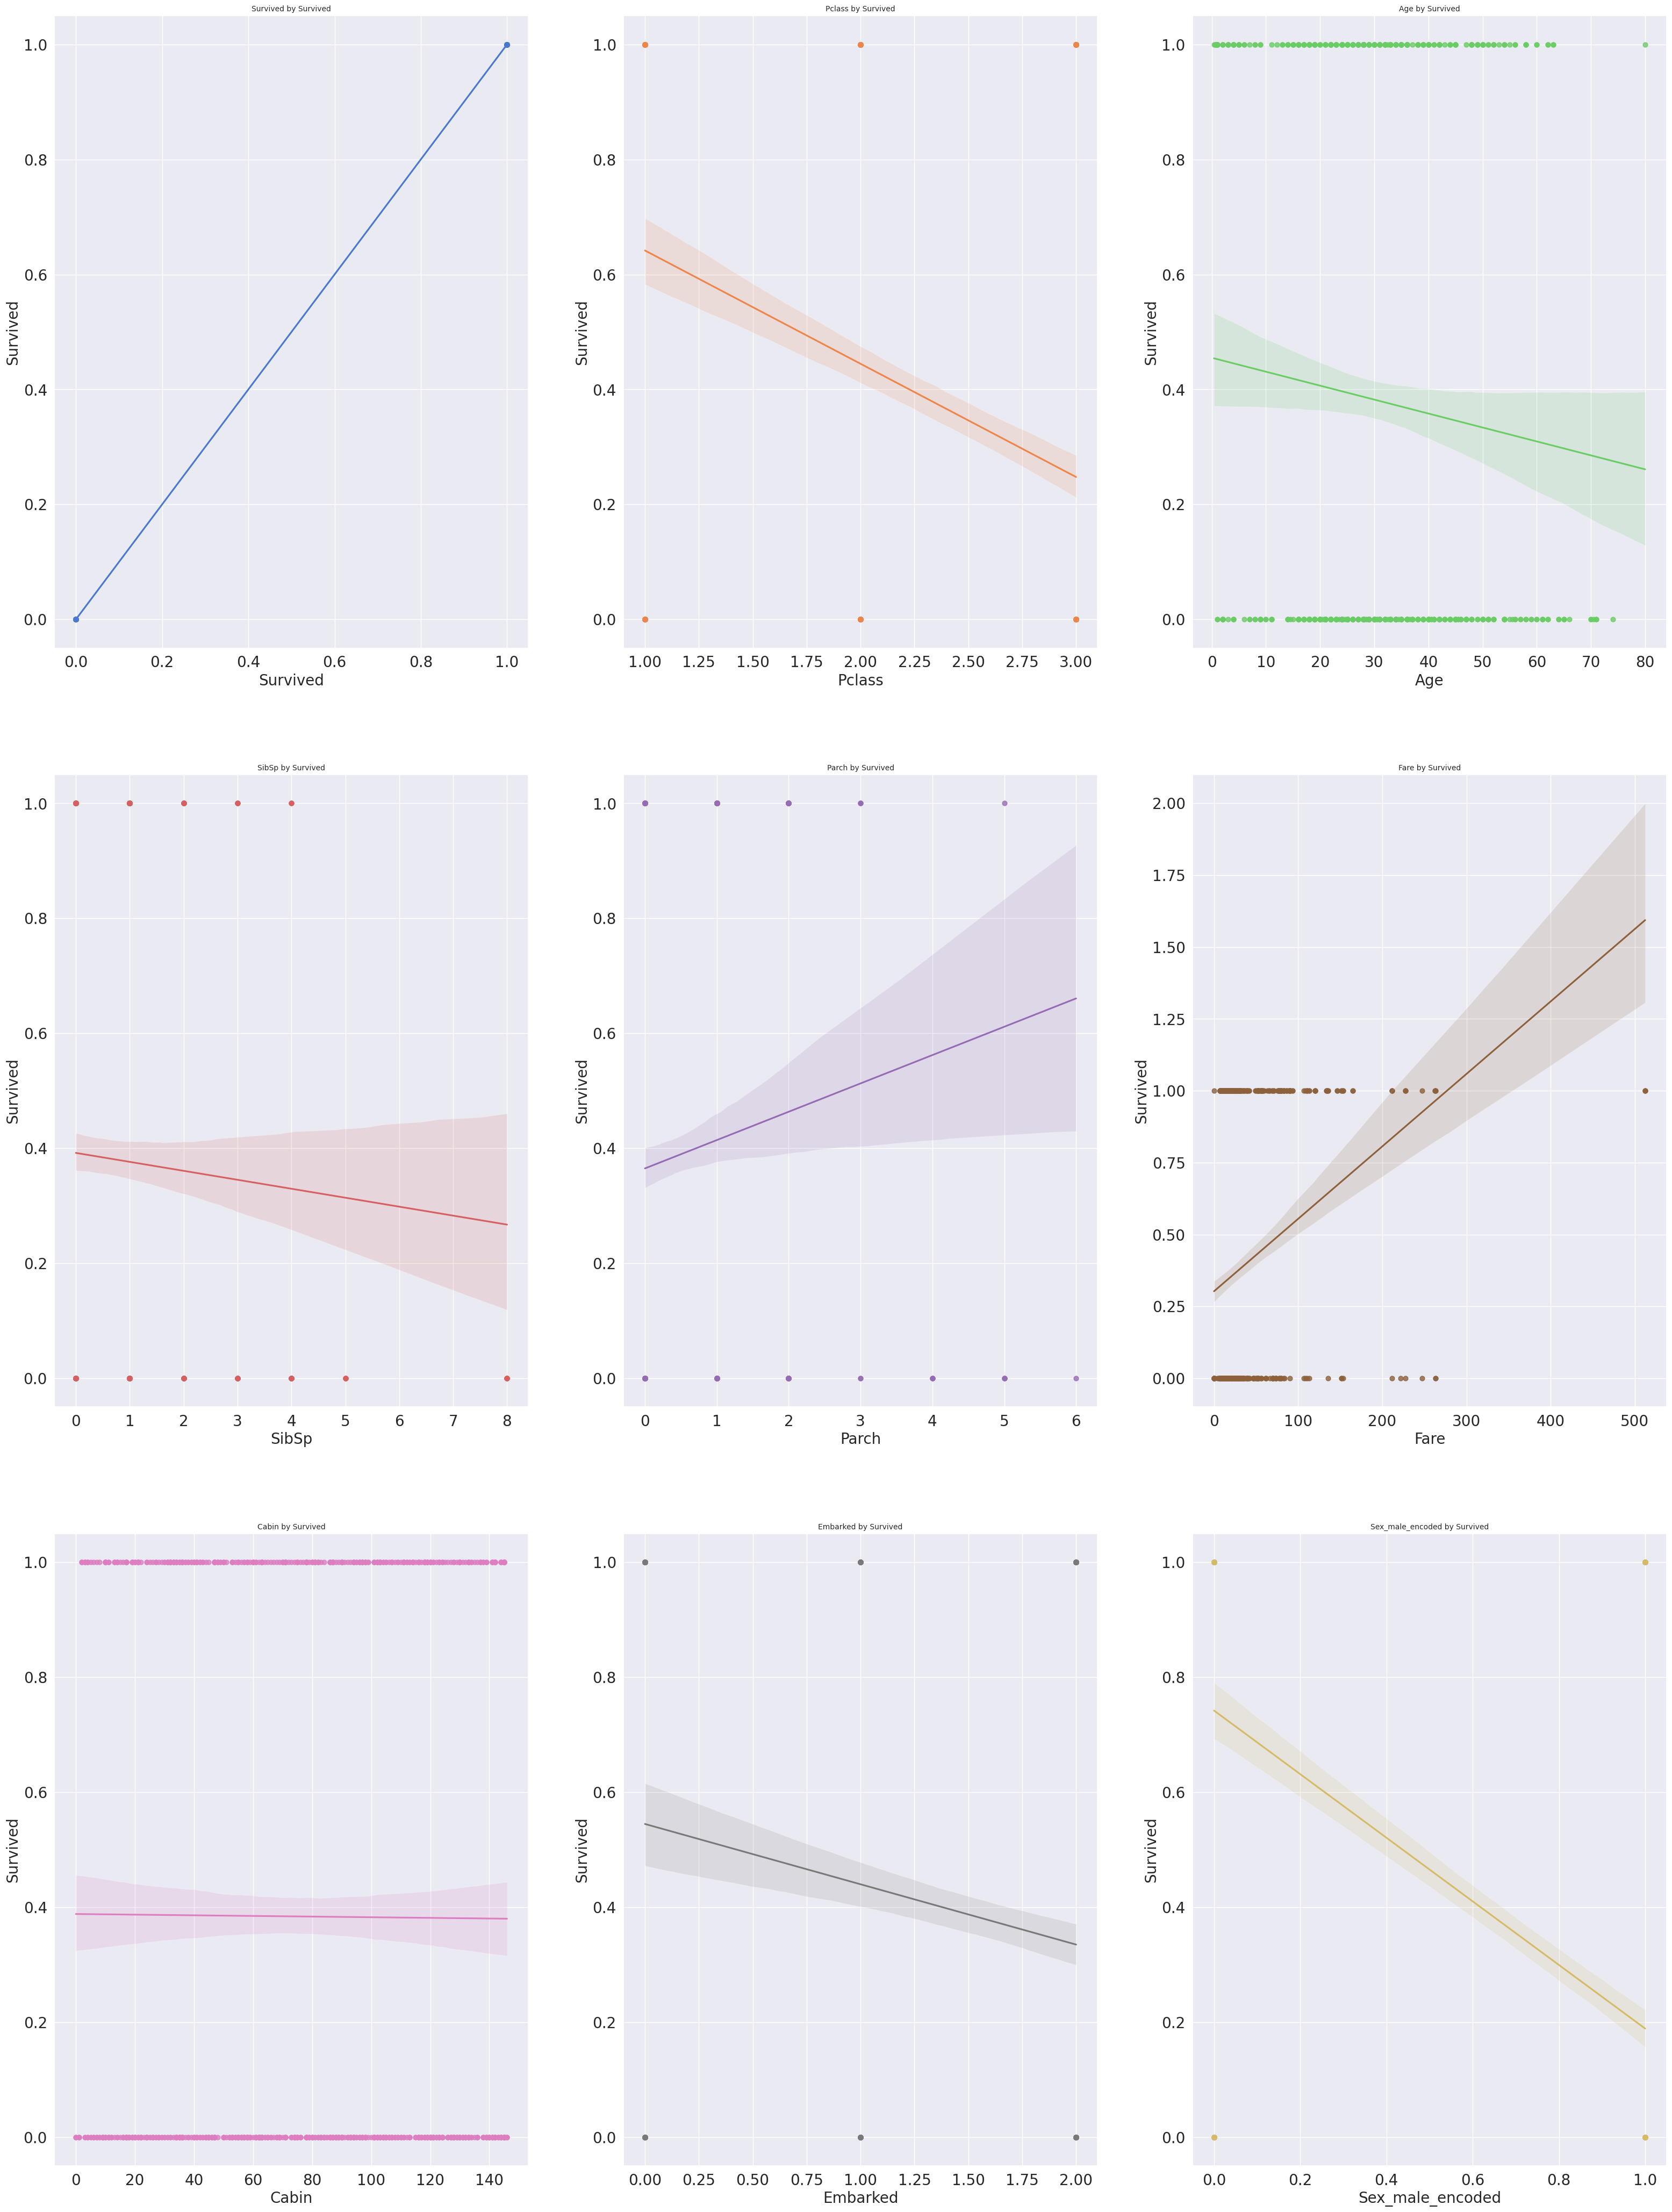

In [24]:
plot_reg_target_values_by_each_feature(train_df, 'Survived')

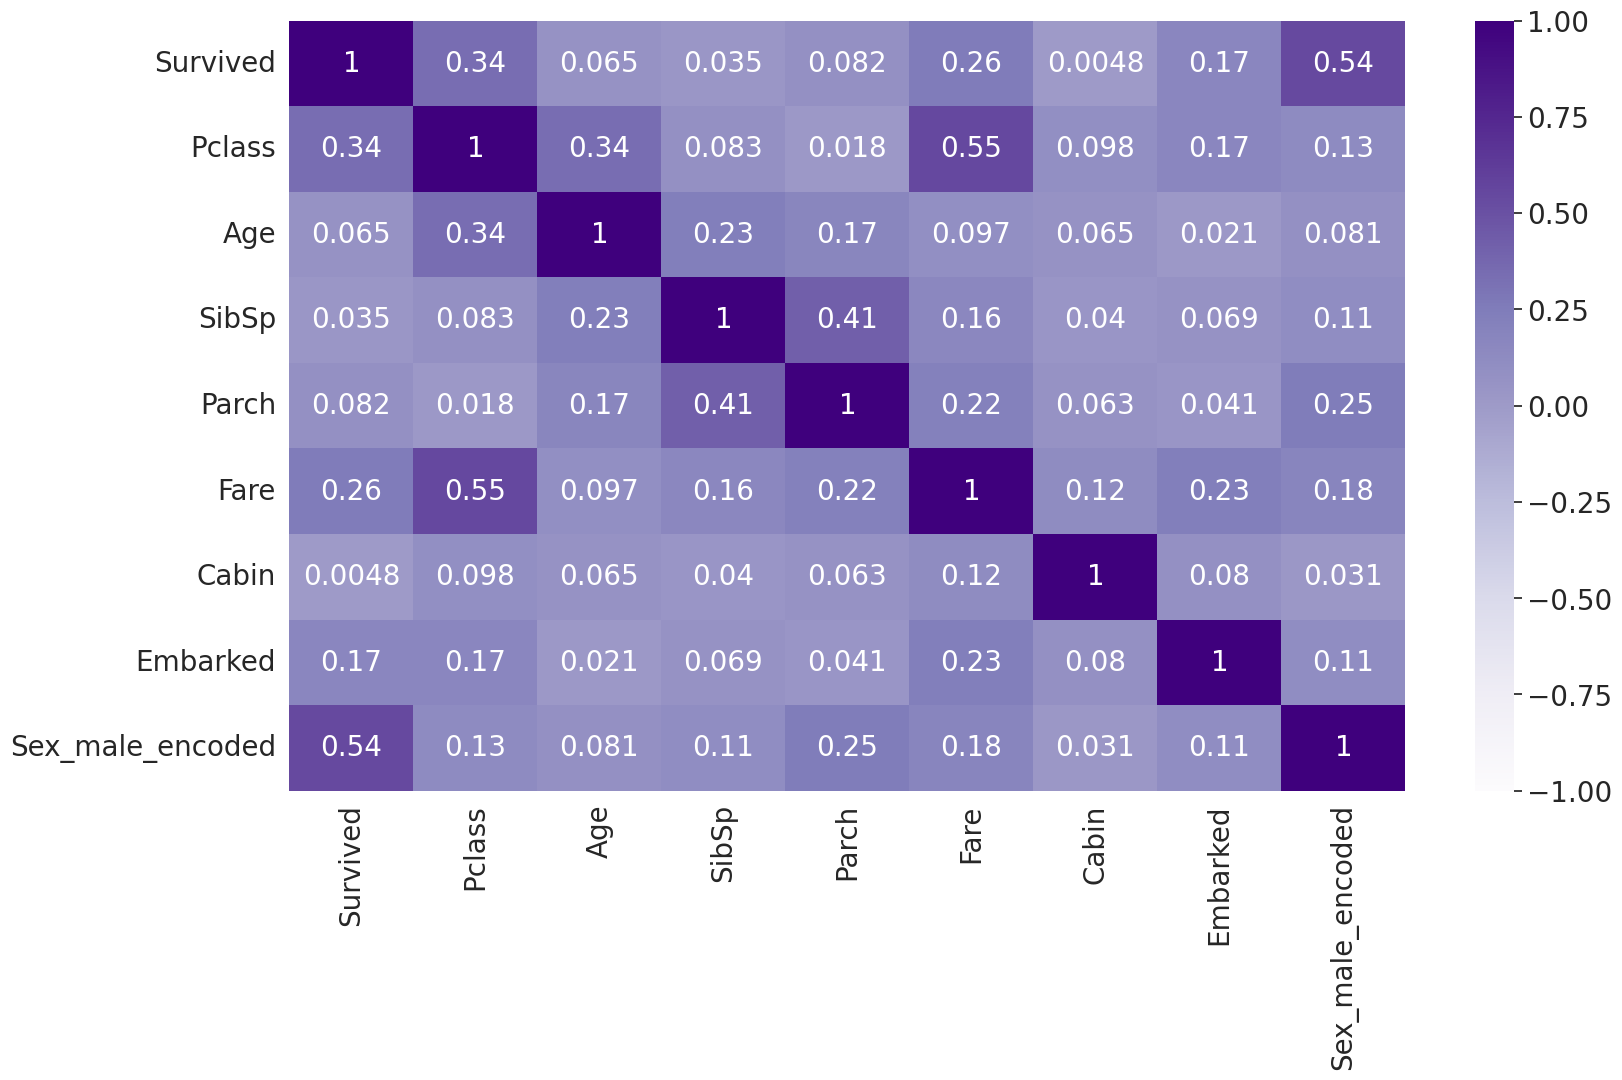

In [25]:
show_heatmap(train_df)

As we expected Sex_encoded has a really good correlation to the goal, in addition there seems to be a good correlation between Fare and Pclass and there is some connection between them so we will try to create a new feature from them as FarePerPclass as follows:

FarePerPclass = Fare / Pclass

In [26]:
# adding FarePerPclass to train_cp data
train_cp = train_df.copy()
train_cp.insert(len(train_df.columns), 'FarePerPclass', train_cp['Fare'] / train_cp['Pclass'])

# adding FarePerPclass to test_cp data
test_cp = test_df.copy()
test_cp.insert(len(test_df.columns), 'FarePerPclass', test_cp['Fare'] / test_cp['Pclass'])

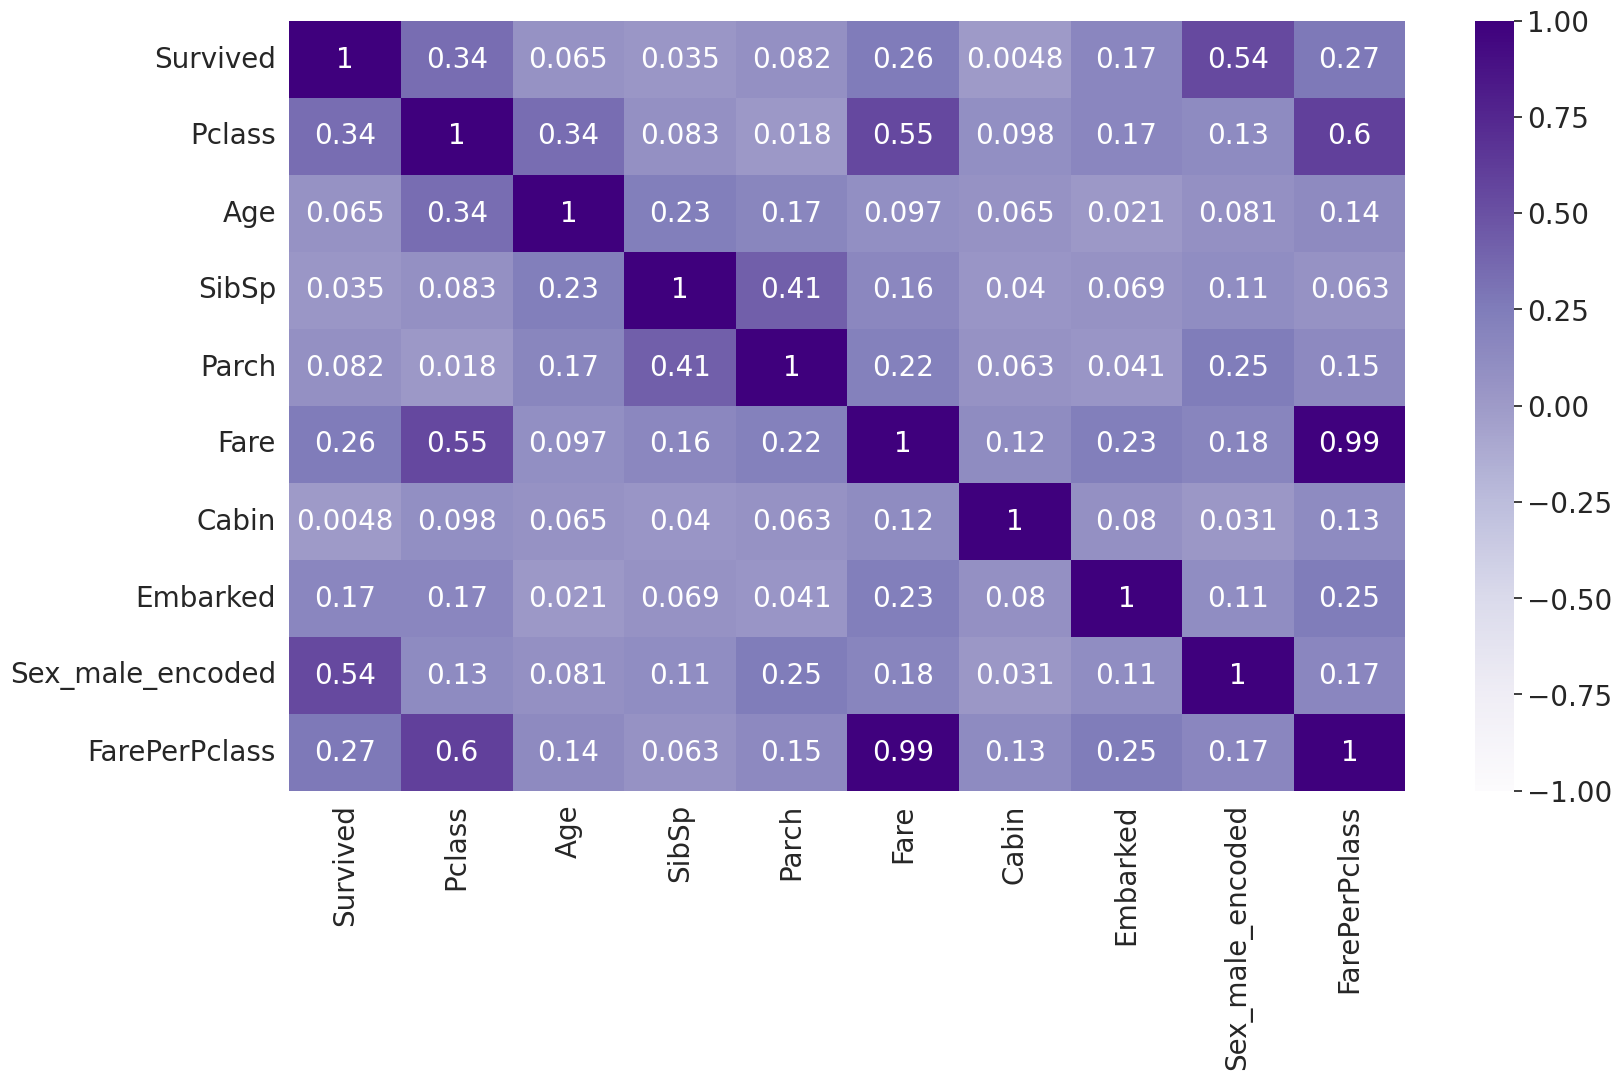

In [27]:
# showing heatmap of the copy train data with the new feature FarePerPclass
show_heatmap(train_cp)

The correlation coefficient of 0.27 between the new feature and the target feature is notably favorable when compared to the correlations observed in the training dataset.

In [28]:
# print 4 graphs: ce of train/test and r2 of train/test
def print_graphs_r2_ce(graph_points):
  for k, v in graph_points.items():
    best_value = max(v.values()) if 'R2' in k else min(v.values())
    best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
    color = 'r' if 'train' in k else 'b'
    plt.rcParams["figure.figsize"] = (16, 8)
    plt.plot(list(v.keys()), list(v.values()), color)
    plt.grid()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'{k}, best value: x={best_index + 1}, y={best_value}', fontsize=20)
    plt.show()

In [29]:
# plot the score by split and the loss by split for SGD
def plot_score_and_loss_by_split_SGD(x, t):
  graph_points = { 'train_CE': {}, 'val_CE': {}, 'train_R2': {}, 'val_R2': {} }

  for size in range(10, 100, 10):
    x_train, x_val, t_train, t_val = model_selection.train_test_split(x, t, test_size=size/100, random_state=42)
    SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(x_train, t_train)
    y_train_prob = SGD_cls.predict_proba(x_train)
    y_test_prob = SGD_cls.predict_proba(x_val)
    y_train = SGD_cls.predict(x_train)
    y_val = SGD_cls.predict(x_val)
    graph_points['train_CE'][size/100] = metrics.log_loss(t_train, y_train_prob)
    graph_points['val_CE'][size/100] = metrics.log_loss(t_val, y_test_prob)
    graph_points['train_R2'][size/100] = SGD_cls.score(x_train, t_train)
    graph_points['val_R2'][size/100] = SGD_cls.score(x_val, t_val)
  print_graphs_r2_ce(graph_points)

In [30]:
# plot the score by split and the loss by split for MLP
def plot_score_and_loss_by_split_MLP(x, t):
  graph_points = { 'train_CE': {}, 'val_CE': {}, 'train_R2': {}, 'val_R2': {} }

  for size in range(10, 100, 10):
    x_train, x_val, t_train, t_val = model_selection.train_test_split(x, t, test_size=size/100, random_state=42)
    MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=40000).fit(x_train, t_train)
    y_train_prob = MLP_cls.predict_proba(x_train)
    y_test_prob = MLP_cls.predict_proba(x_val)
    graph_points['train_CE'][size/100] = metrics.log_loss(t_train, y_train_prob)
    graph_points['val_CE'][size/100] = metrics.log_loss(t_val, y_test_prob)
    graph_points['train_R2'][size/100] = MLP_cls.score(x_train, t_train)
    graph_points['val_R2'][size/100] = MLP_cls.score(x_val, t_val)
  print_graphs_r2_ce(graph_points)

In [31]:
# divide the data to features and target
t = train_df['Survived'].copy()
X = train_df.drop(['Survived'], axis=1)
print('t')
display(t)
print()
print('x')
display(X)

t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


x


,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male_encoded
0,3,22.0,1,0,7.2500,13,2,1.0
1,1,38.0,1,0,71.2833,81,0,0.0
2,3,26.0,0,0,7.9250,19,2,0.0
3,1,35.0,1,0,53.1000,55,2,0.0
4,3,35.0,0,0,8.0500,86,2,1.0
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,45,2,1.0
887,1,19.0,0,0,30.0000,30,2,0.0
888,3,28.0,1,2,23.4500,109,2,0.0
889,1,26.0,0,0,30.0000,60,0,1.0


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

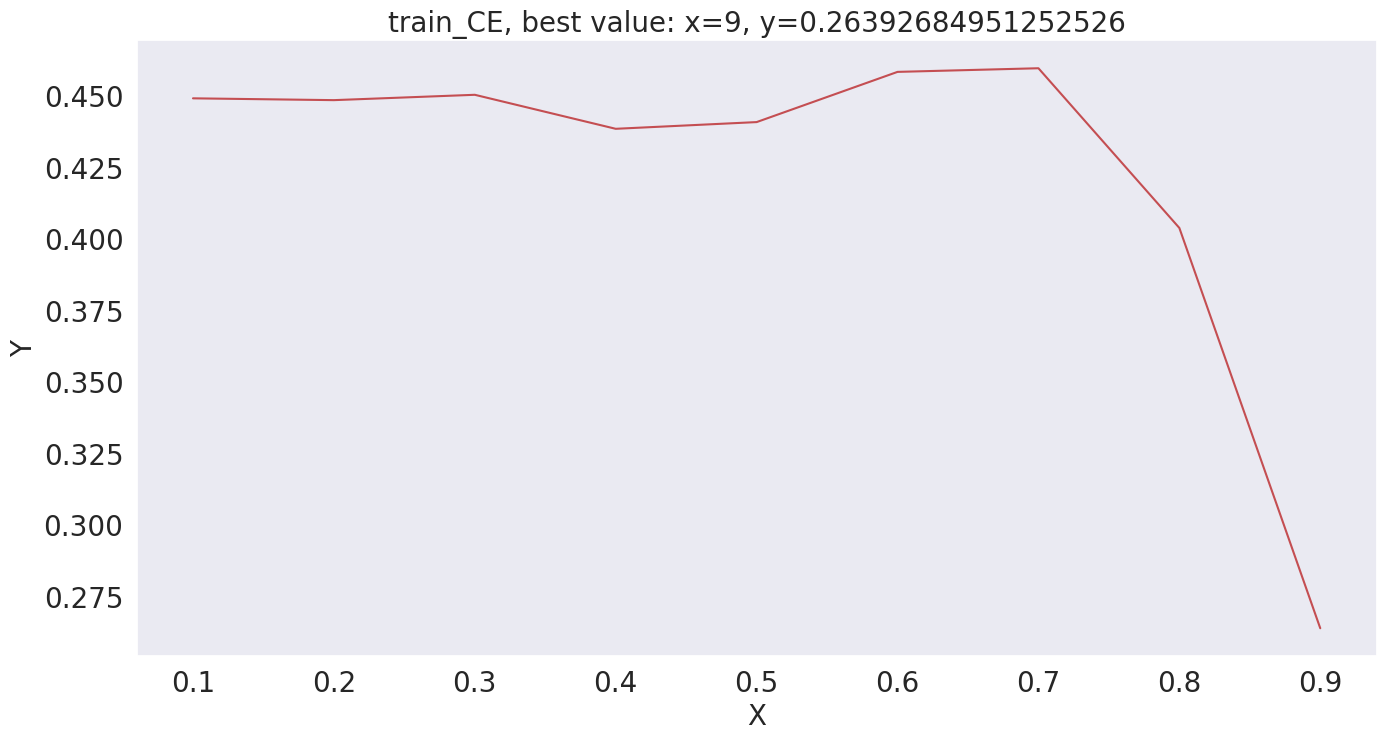

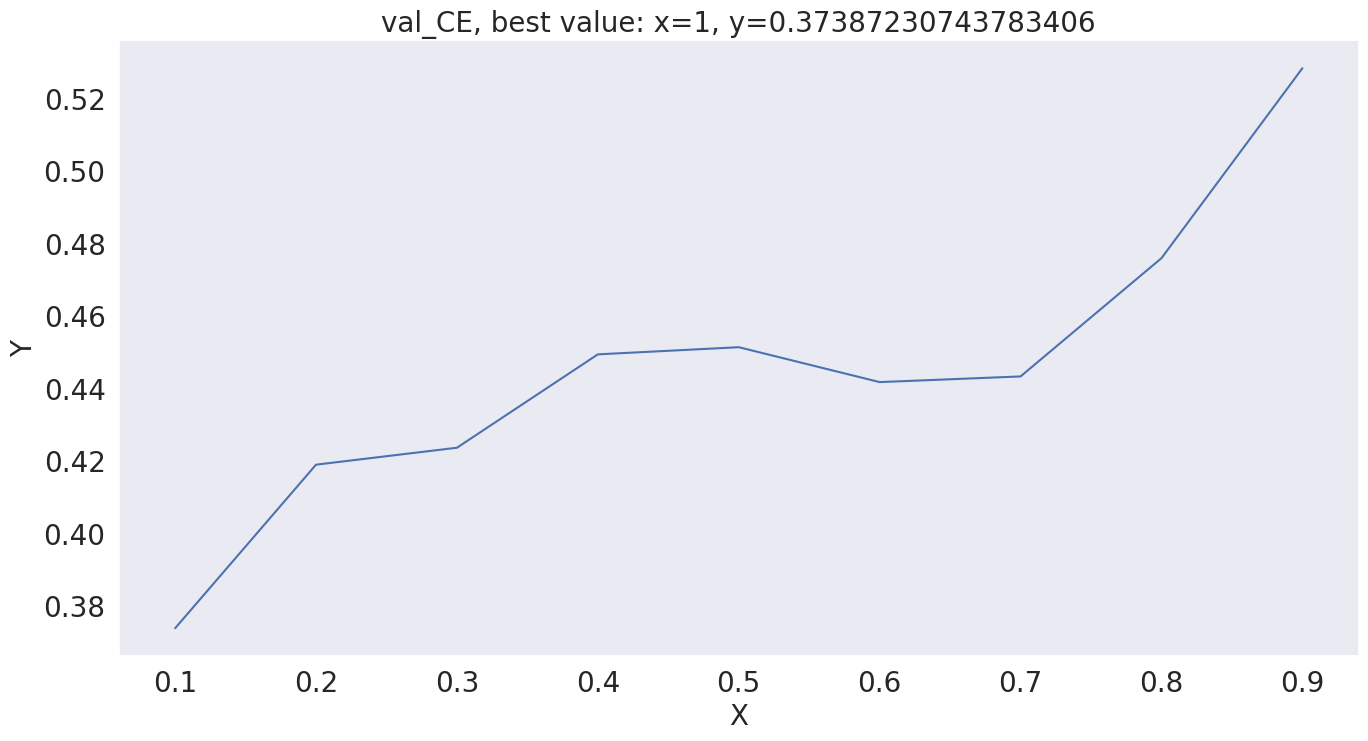

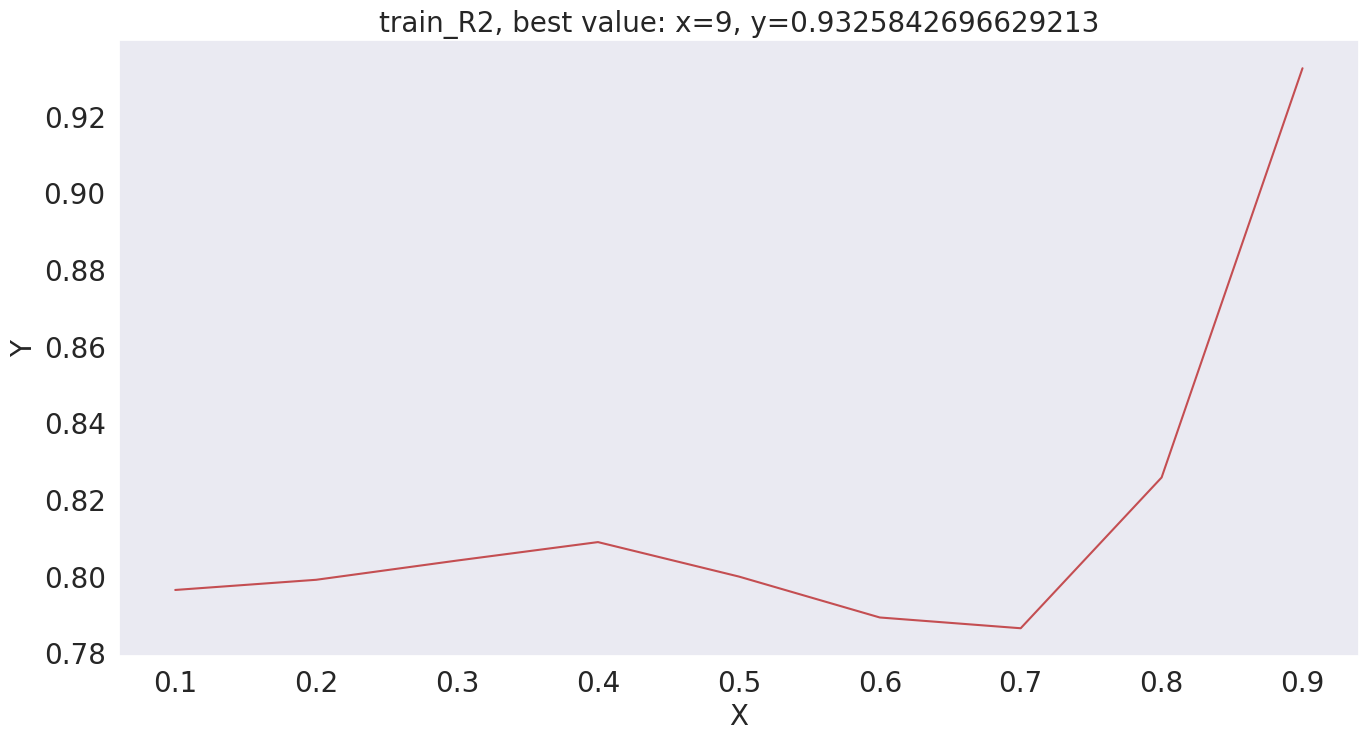

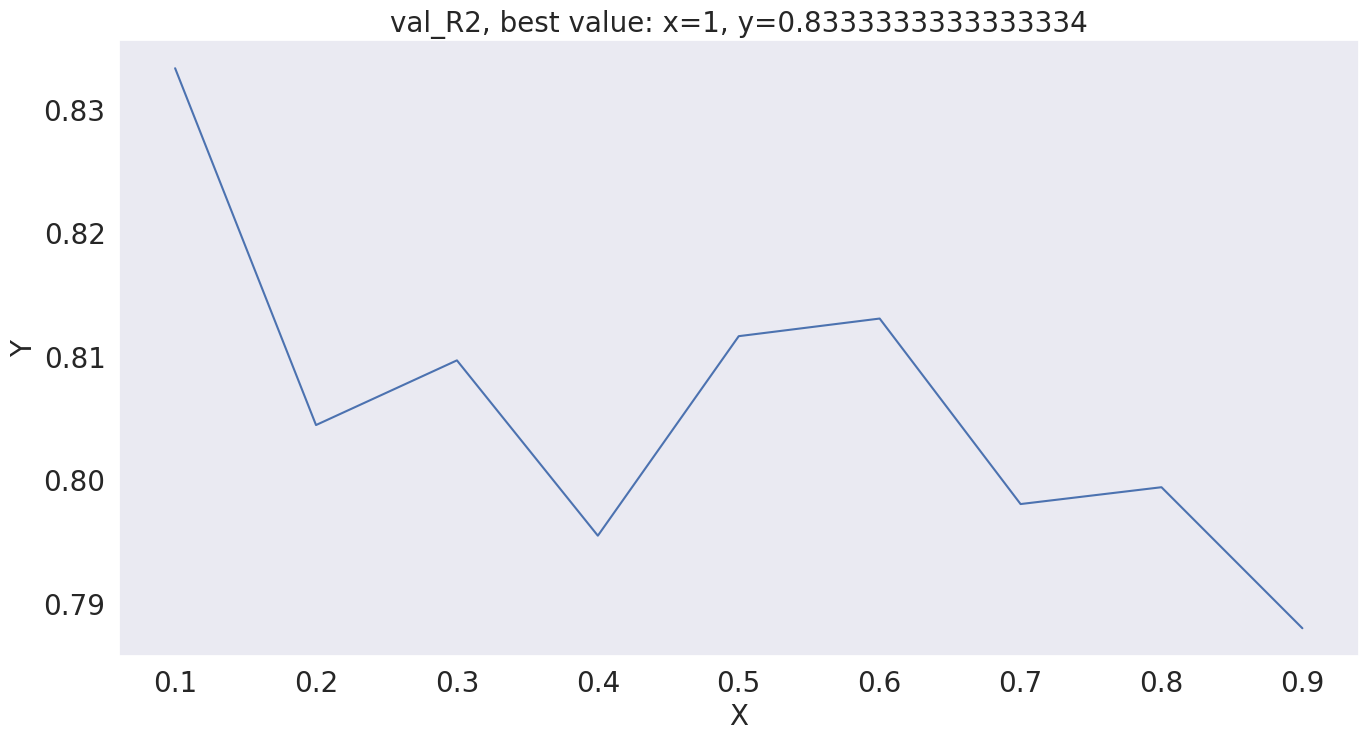

In [32]:
 #plot the train on SGD model be different slicing of the data
plot_score_and_loss_by_split_SGD(X, t)

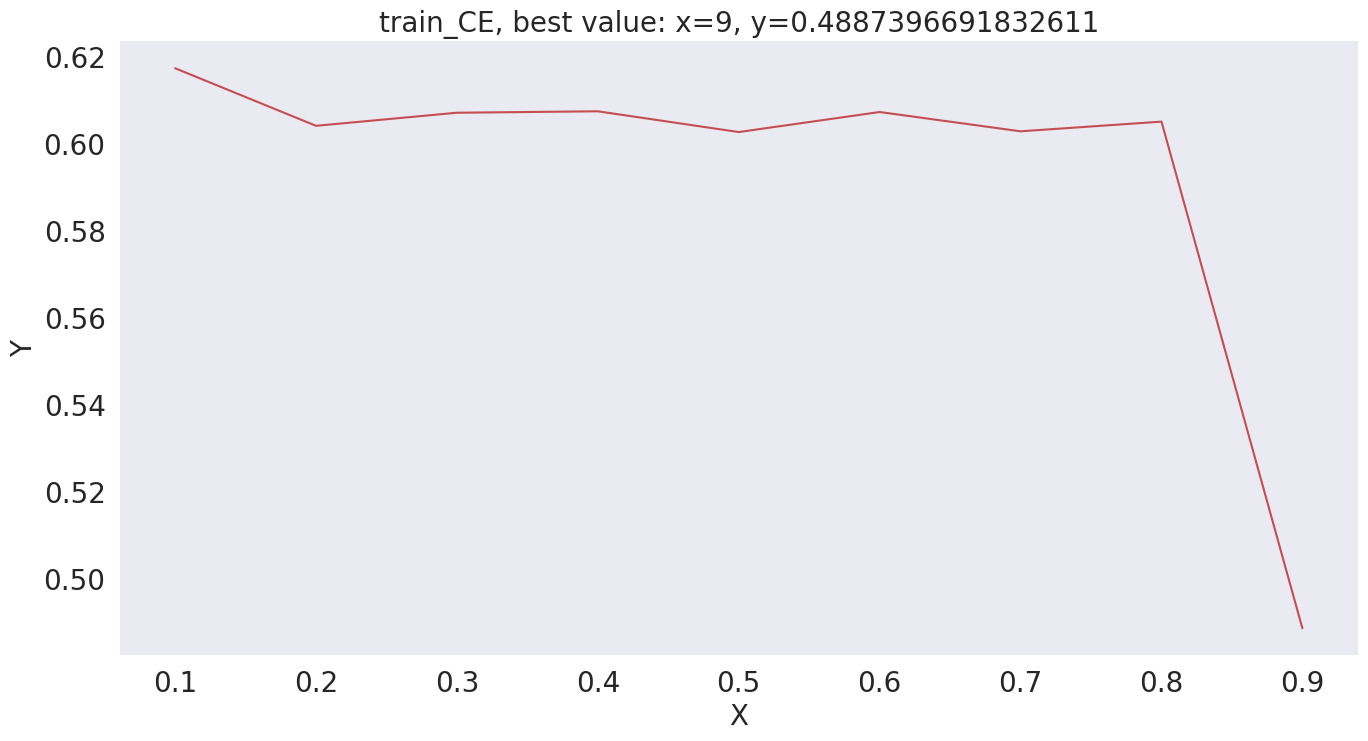

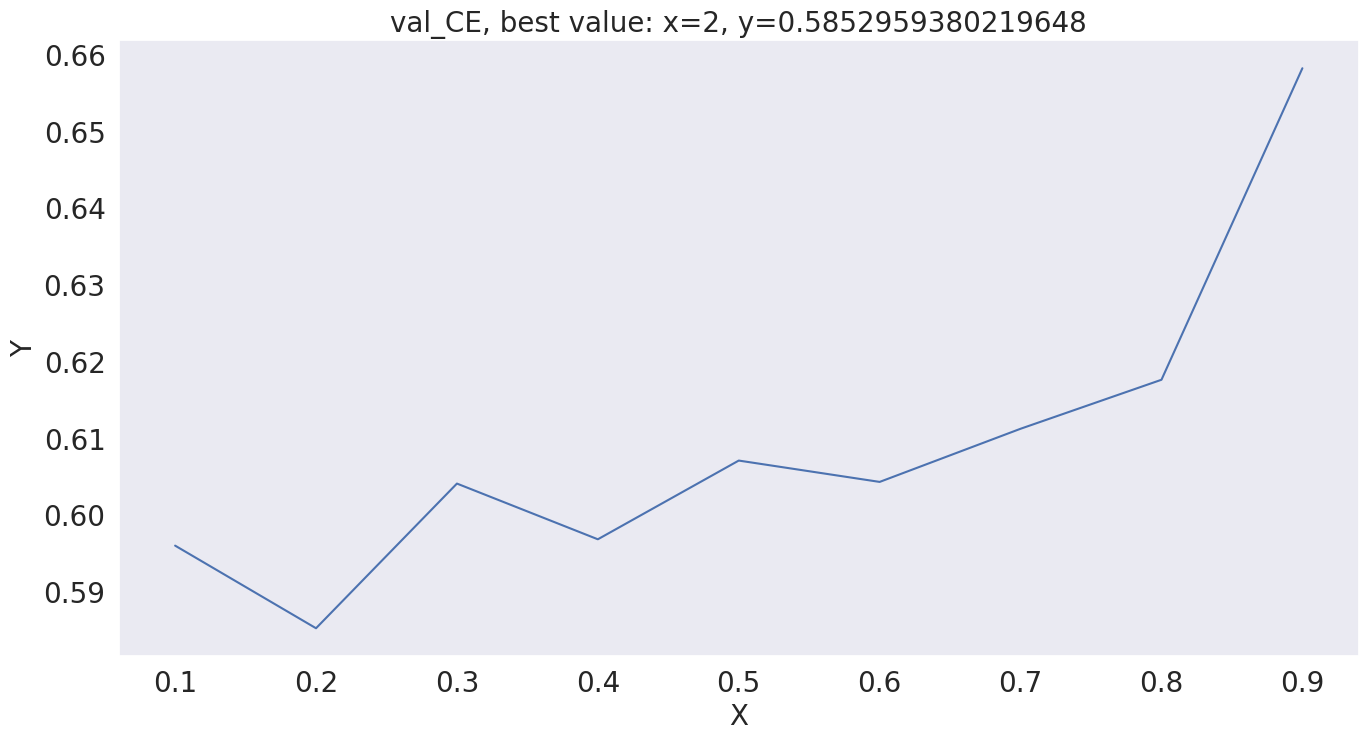

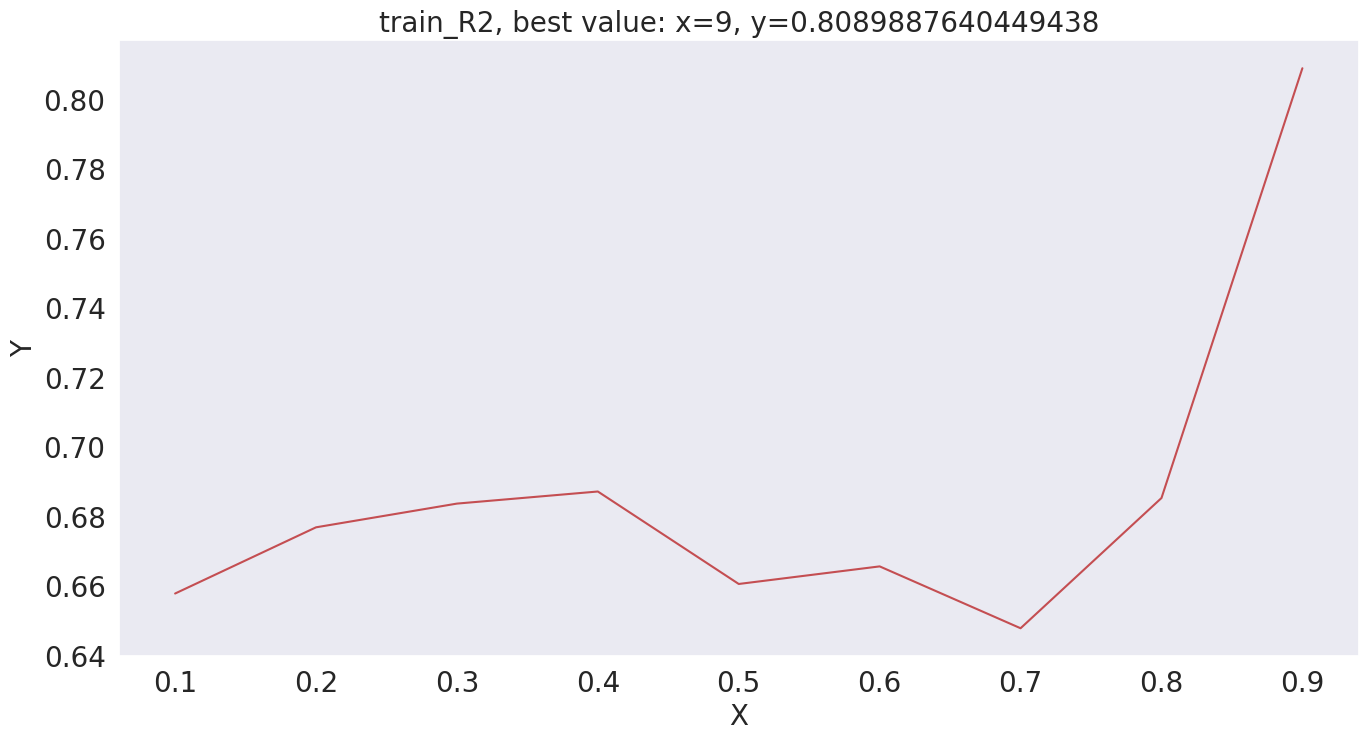

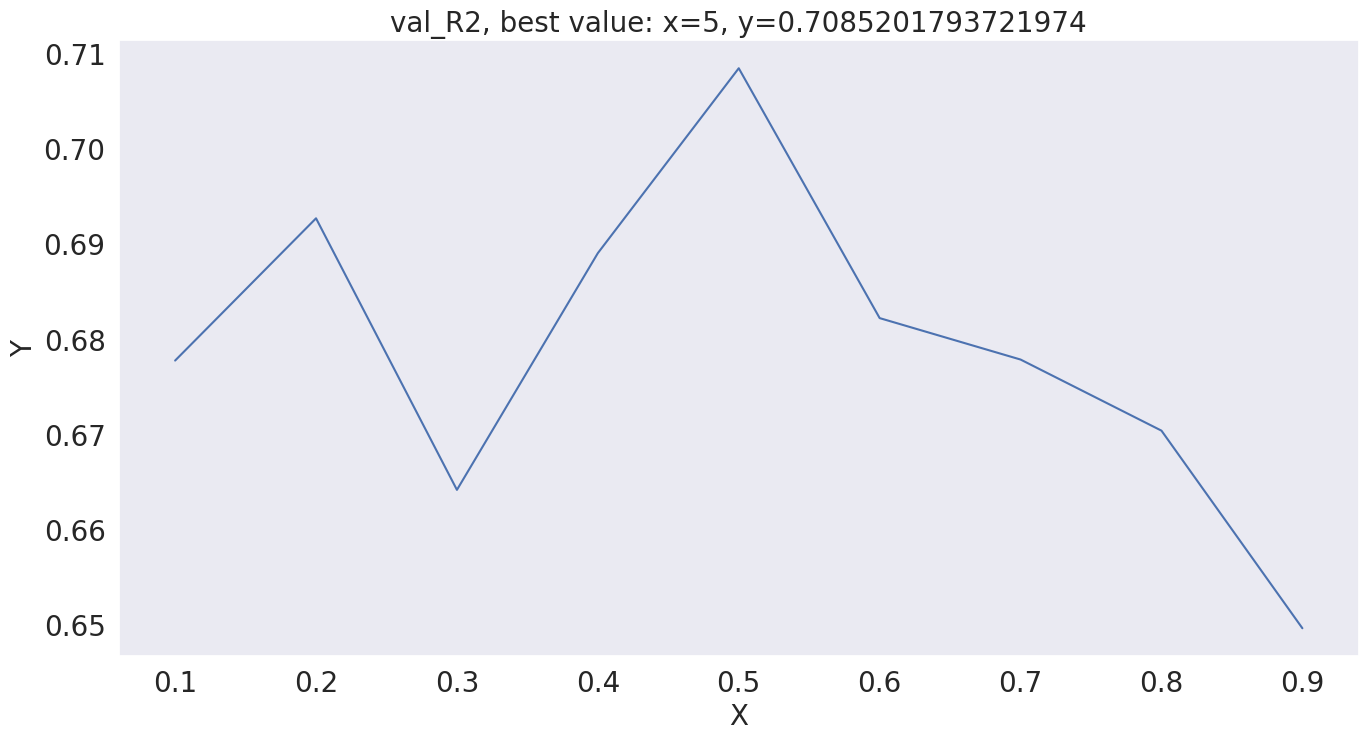

In [33]:
# plot the train on MLP model be different slicing of the data
plot_score_and_loss_by_split_MLP(X, t)


In [34]:
# divide the data to features and target
t_cp = train_cp['Survived'].copy()
X_cp = train_cp.drop(['Survived'], axis=1)
print('t copy')
display(t_cp)
print()
print('X copy')
display(X_cp)

t copy


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


X copy


,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male_encoded,FarePerPclass
0,3,22.0,1,0,7.2500,13,2,1.0,2.416667
1,1,38.0,1,0,71.2833,81,0,0.0,71.283300
2,3,26.0,0,0,7.9250,19,2,0.0,2.641667
3,1,35.0,1,0,53.1000,55,2,0.0,53.100000
4,3,35.0,0,0,8.0500,86,2,1.0,2.683333
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,45,2,1.0,6.500000
887,1,19.0,0,0,30.0000,30,2,0.0,30.000000
888,3,28.0,1,2,23.4500,109,2,0.0,7.816667
889,1,26.0,0,0,30.0000,60,0,1.0,30.000000


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

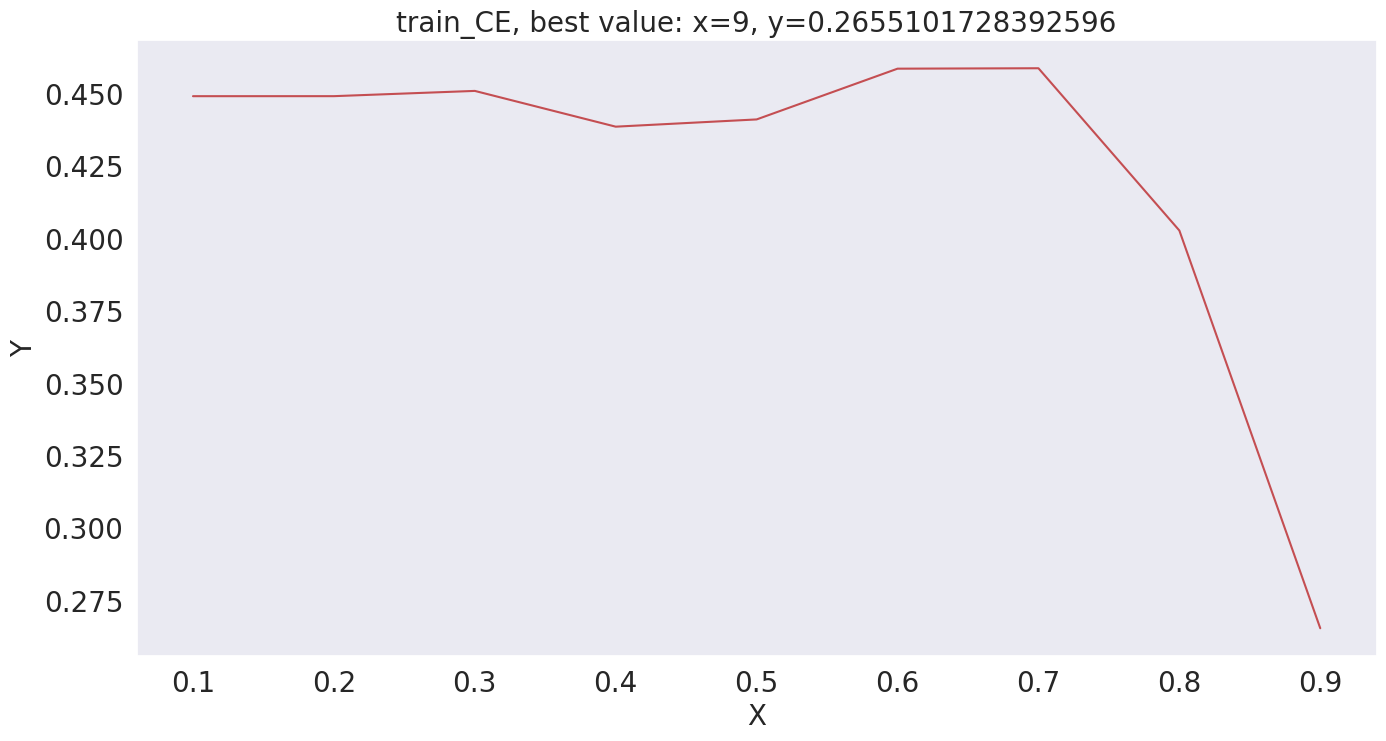

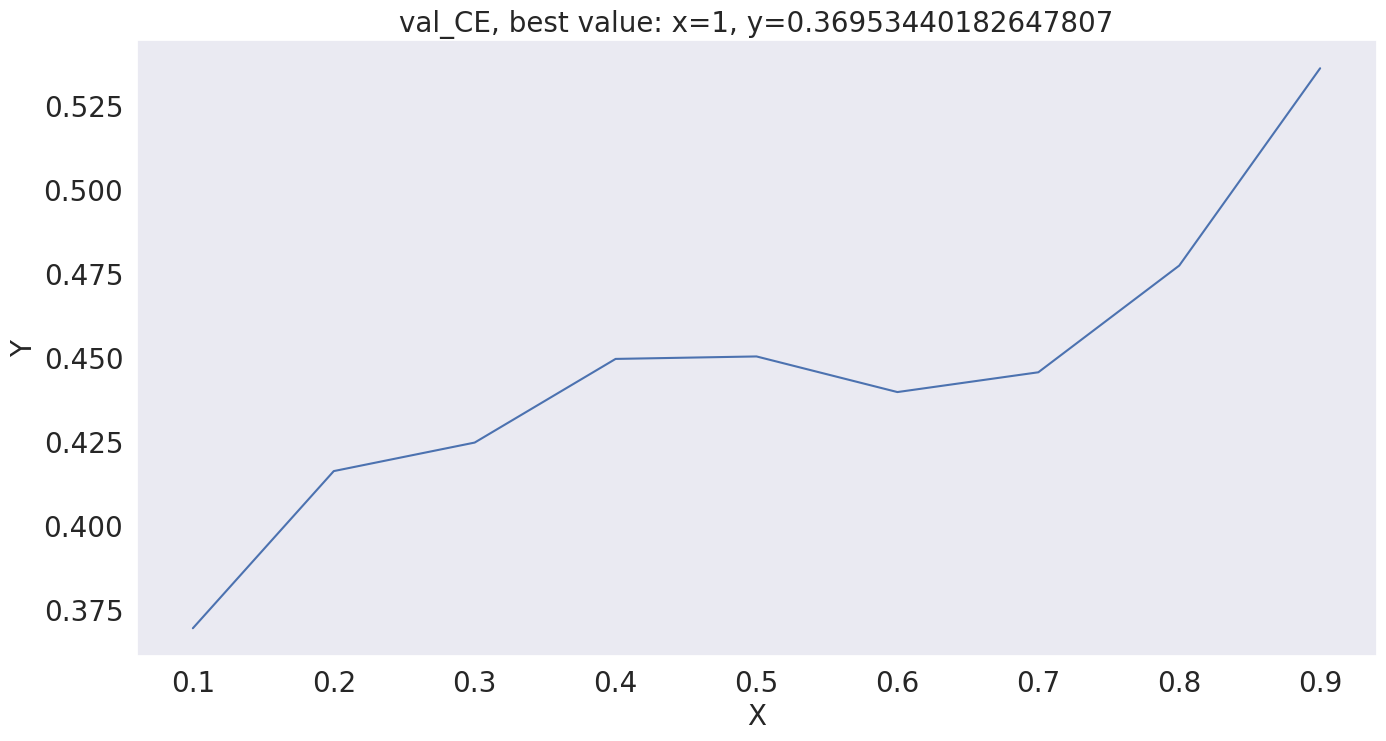

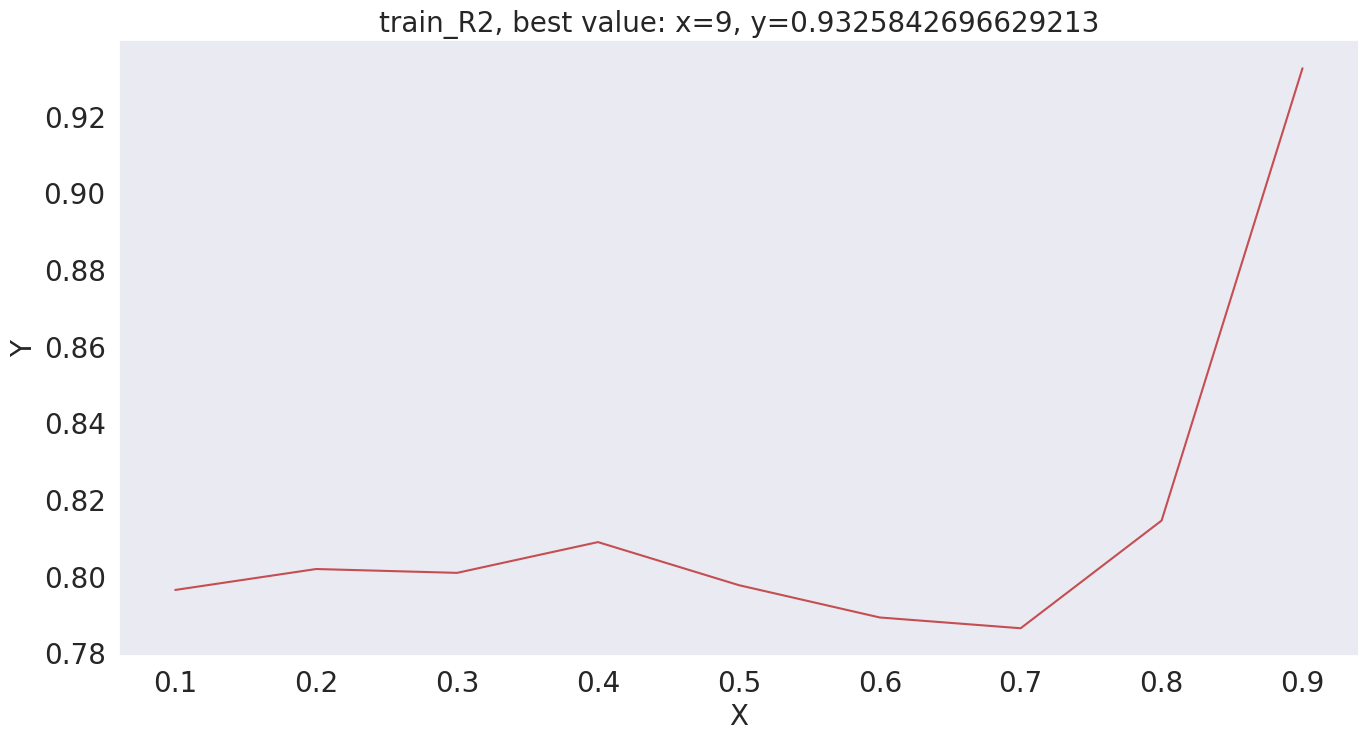

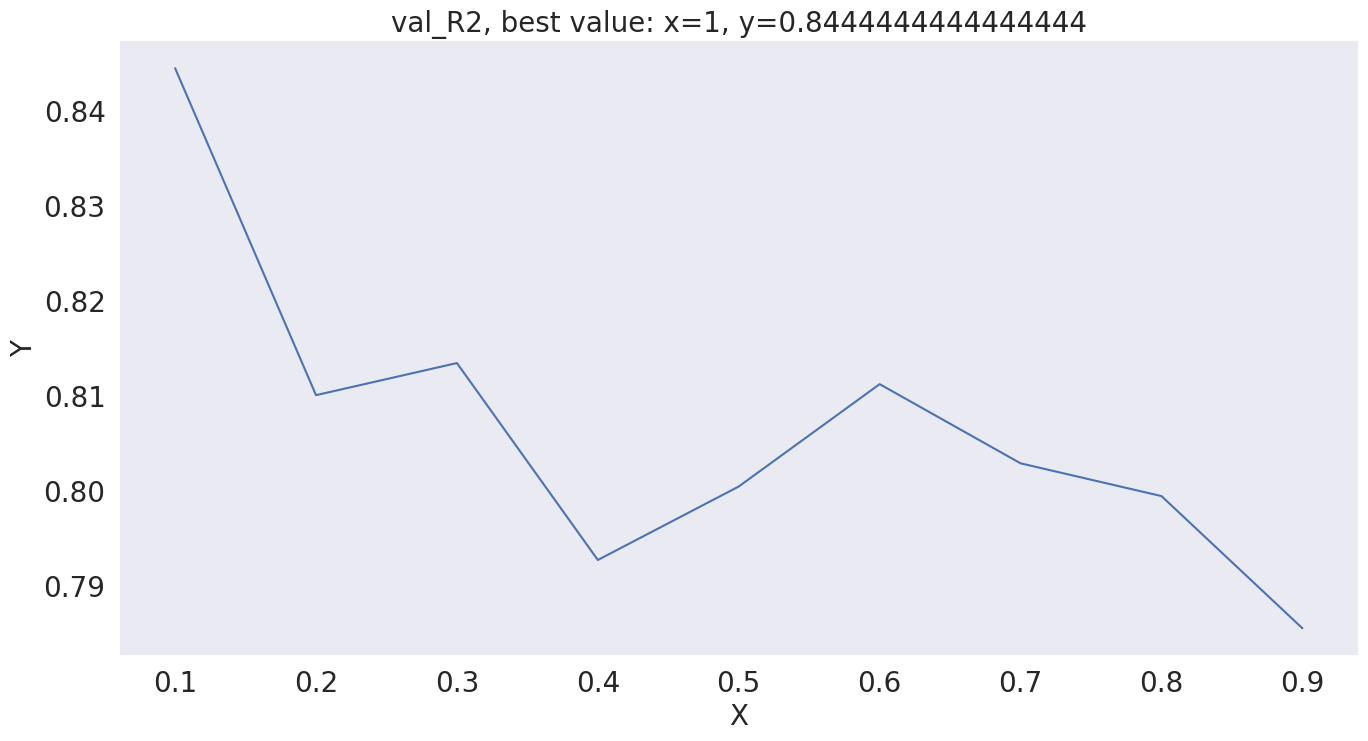

In [35]:
# plot the train_cp on SGD model be different slicing of the data with addiition features
plot_score_and_loss_by_split_SGD(X_cp, t_cp)

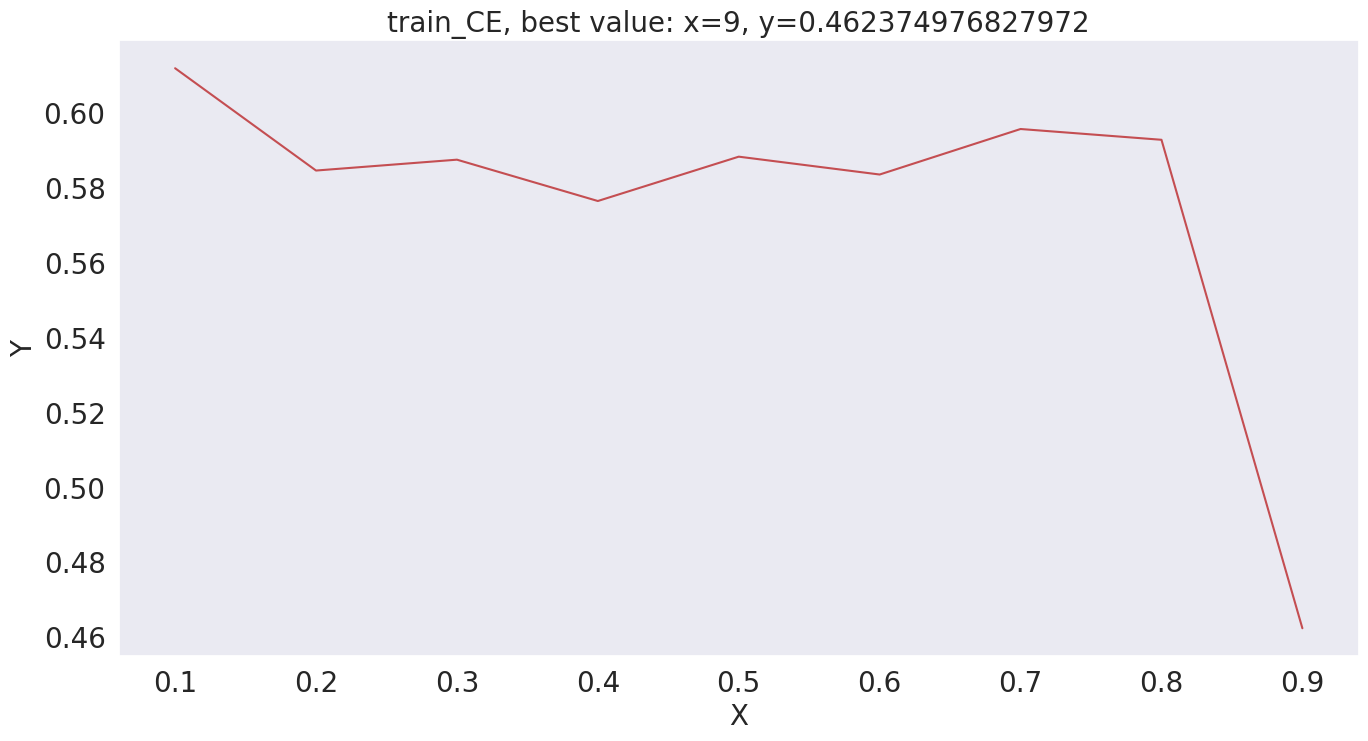

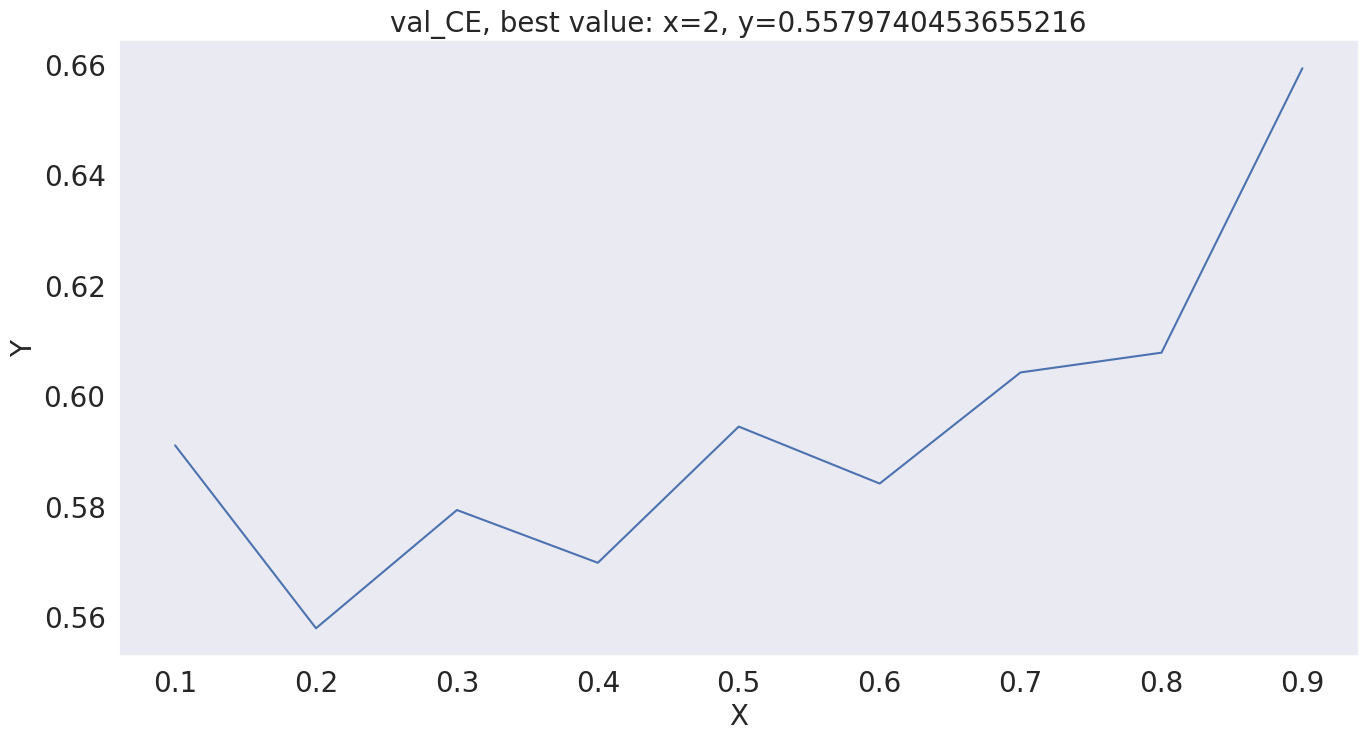

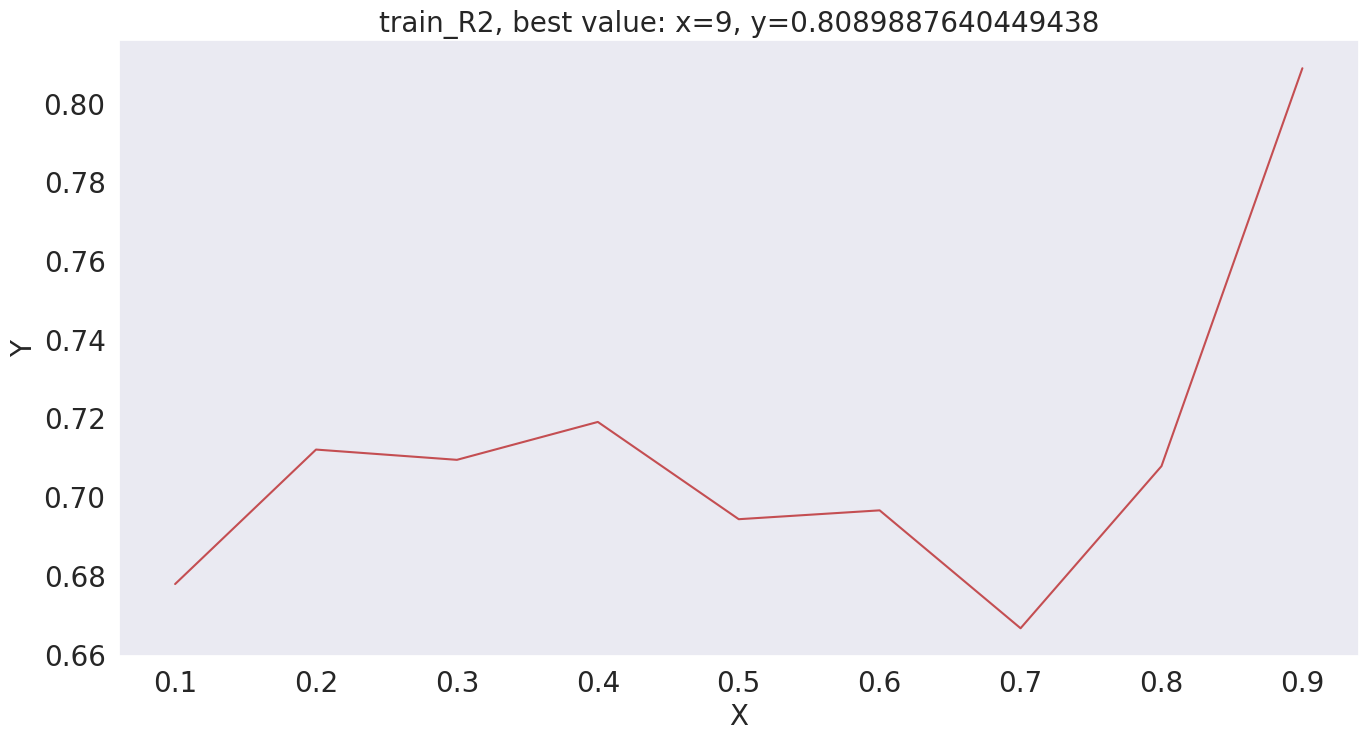

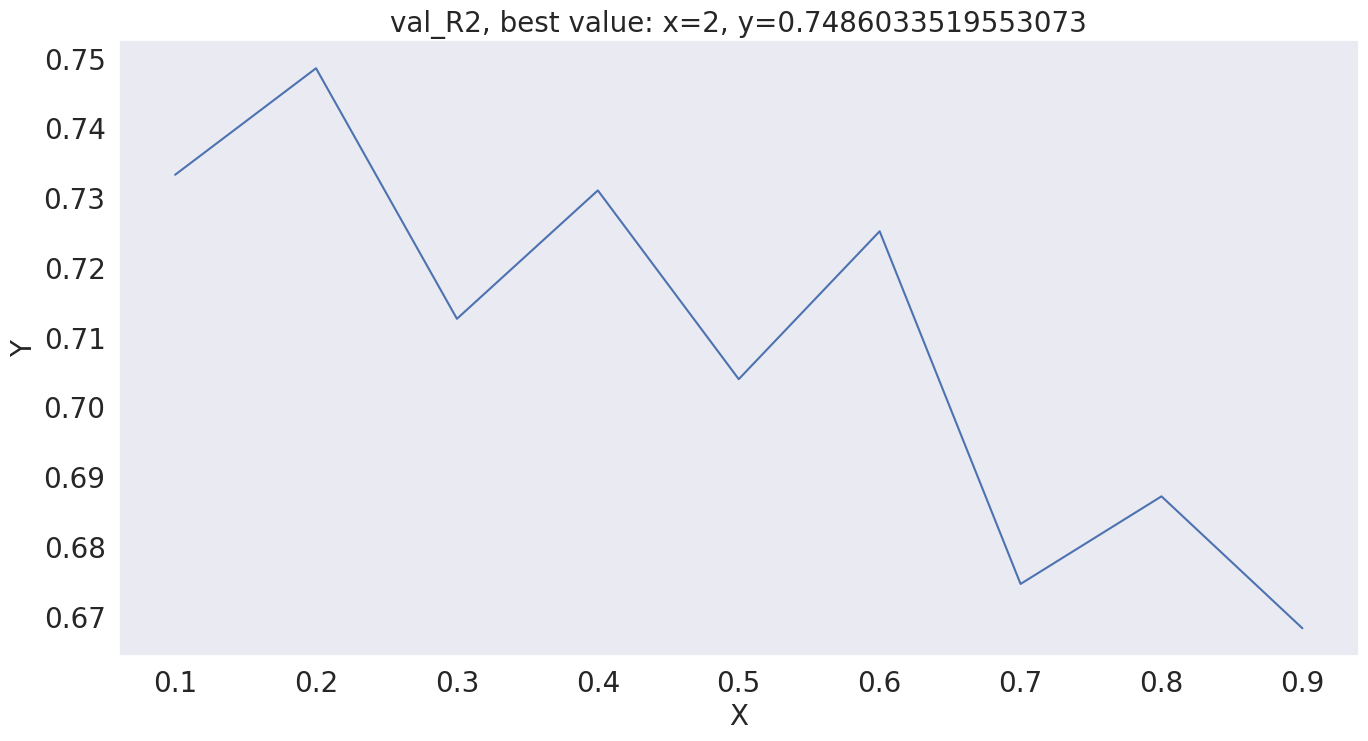

In [36]:
# plot the train_cp on MLP model be different slicing of the data
plot_score_and_loss_by_split_MLP(X_cp, t_cp)

In [37]:
# split the train data to 75% train and 25% validation
x_train, x_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=0.30, random_state=42)

In [38]:
 #create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
     linear_model.SGDClassifier(loss='log_loss', alpha=0,
                                learning_rate='constant',
                                eta0=0.01)
     ).fit(x_train, t_train)

y_train_prob = SGD_cls.predict_proba(x_train)
y_test_prob = SGD_cls.predict_proba(x_val)

y_train = SGD_cls.predict(x_train)
y_test = SGD_cls.predict(x_val)


In [39]:
# print the accuracy score and CE loss of the train and test
print('Accuracy score on train',
      SGD_cls.score(x_train, t_train))
print('Accuracy score on test',
      SGD_cls.score(x_val, t_val))
print()
print('CE on train',
      metrics.log_loss(t_train, y_train_prob))
print('CE on test', 
      metrics.log_loss(t_val, y_test_prob))

Accuracy score on train 0.7993579454253612
Accuracy score on test 0.8097014925373134

CE on train 0.4508224176128443
CE on test 0.4242450037343132


In [40]:
submission_preds = SGD_cls.predict(test_df)
df=pd.DataFrame({"PassengerId":test_ids.values,
                  "Survived":submission_preds
                 })
df.to_csv("submission.csv",index=False)

# Exercise 3

# Cross Validation

In [41]:
# find generator length
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [42]:
# calculate precision, recall, specificity, fpr and accuracy
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

# calculate f1 and balanced accuracy
def f1(cm):
    precision_calc = precision(cm)
    recall_calc = recall(cm)
    return (2*precision_calc*recall_calc)/(precision_calc+recall_calc)

def balanced_accuracy(cm):
    recall_calc = recall(cm)
    specificity_calc = specificity(cm)
    return (recall_calc+specificity_calc)/2

def calc_metrics(cm):
  return {
      'precision': precision(cm),
      'recall': recall(cm),
      'specificity': specificity(cm),
      'fpr': fpr(cm),
      'accuracy': accuracy(cm),
      'f1': f1(cm),
      'balanced accuracy': balanced_accuracy(cm),
  }

In [43]:
# print all metrics from confusion_matrix for train and validation
def print_confusion_matrix(model, cm_train, cm_val):
  cm_train_df = pd.DataFrame(cm_train, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])
  cm_val_df = pd.DataFrame(cm_val, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])

  print('Confusion Matrix')
  fig, ax = plt.subplots(ncols=2, figsize=(10,3))
  for i, (df, title) in enumerate(zip([cm_train_df, cm_val_df], ['Train', 'Validation'])):
    fig = sns.heatmap(df, annot=True, ax=ax[i], cmap=plt.cm.Pastel1, fmt='g')
    fig.set_title(title)
  plt.subplots_adjust(top=1.5, bottom=0, left=0, right=1)
  plt.show()

  display(pd.DataFrame({ 'Tarin': calc_metrics(cm_train), 'Validation': calc_metrics(cm_val) }))

In [44]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
  scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

  if k is not None:
    cv = KFold(n_splits=k, shuffle=True, random_state=2)
  elif p is not None:
    cv = LeavePOut(p)
  else:
    raise ValueError("Must specify either `K` or `P`.")

  if use_pbar:
    pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

  for i, (train_ids, val_ids) in enumerate(cv.split(X)):
    X_train = X.loc[train_ids]
    t_train = t.loc[train_ids]
    X_val = X.loc[val_ids]
    t_val = t.loc[val_ids]

    model.fit(X_train, t_train)

    y_train = model.predict_proba(X_train)
    y_val = model.predict_proba(X_val)

    scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), metrics.log_loss(t_train, y_train)]
    scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), metrics.log_loss(t_val, y_val)]

    if use_pbar:
      pbar.update()

  if use_pbar:
    pbar.close()

  val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
  train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

  mean_val_score = val_scores_losses_df['score'].mean()
  mean_val_loss = val_scores_losses_df['loss'].mean()
  mean_train_score = train_scores_losses_df['score'].mean()
  mean_train_loss = train_scores_losses_df['loss'].mean()
  cm_train = confusion_matrix(t_train, model.predict(X_train))
  cm_val = confusion_matrix(t_val, model.predict(X_val))

  if show_score_loss_graphs:
    fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Validation Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
    fig.show()
    fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Validation Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
    fig.show()
    print_confusion_matrix(model, cm_train, cm_val)

  return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

# Data Encoding

#### We will take X_cp with the new feature IsAlone because It showed better accuracy at first so it may help predictions in this part more than the regular X.

In [45]:
# determine categorical and numerical features
numerical_cols = X_cp.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_cp.select_dtypes(include=['object', 'bool']).columns
all_cols = list(categorical_cols) + list(numerical_cols)

print('Numerical Cols:', numerical_cols)
print('Categorical Cols:', categorical_cols)
print('All Cols:', all_cols)

Numerical Cols: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Sex_male_encoded', 'FarePerPclass'],
      dtype='object')
Categorical Cols: Index([], dtype='object')
All Cols: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Sex_male_encoded', 'FarePerPclass']


In [46]:
# use column transformer to use StandardScaler for numerical columns
ct_std = ColumnTransformer([("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_std.fit_transform(X_cp, t), columns=all_cols)

# Feature Selection

In [47]:
# find best subset of features on this dataset
selector = RFECV(SGDClassifier(loss='log', random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X_encoded, t)
X_selected_features = X_encoded.loc[:, selector.support_]
display(X_selected_features)

fig = go.Figure()
results = selector.cv_results_['mean_test_score'] # Getting the mean cv score for each set of features
fig.add_trace(go.Scatter(x=[i for i in range(1, len(results) + 1)], y=results))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

,Pclass,SibSp,Parch,Fare,Sex_male_encoded
0,0.827377,0.432793,-0.473674,-0.502445,0.737695
1,-1.566107,0.432793,-0.473674,0.786845,-1.355574
2,0.827377,-0.474545,-0.473674,-0.488854,-1.355574
3,-1.566107,0.432793,-0.473674,0.420730,-1.355574
4,0.827377,-0.474545,-0.473674,-0.486337,0.737695
...,...,...,...,...,...
886,-0.369365,-0.474545,-0.473674,-0.386671,0.737695
887,-1.566107,-0.474545,-0.473674,-0.044381,-1.355574
888,0.827377,0.432793,2.008933,-0.176263,-1.355574
889,-1.566107,-0.474545,-0.473674,-0.044381,0.737695


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Confusion Matrix


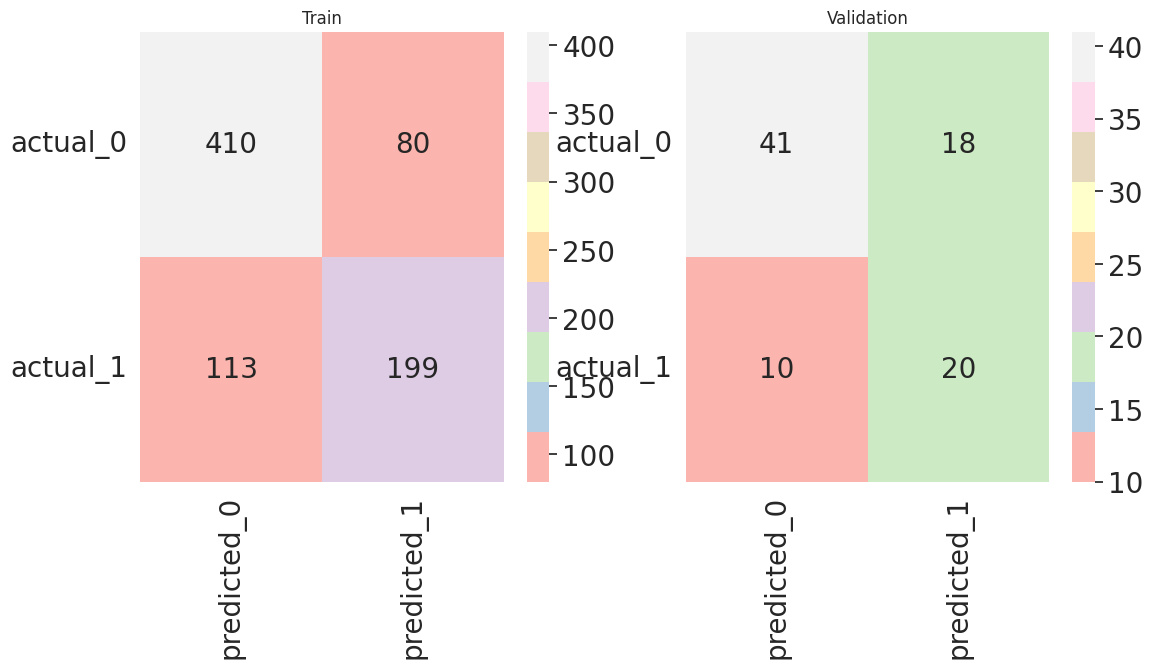

,Tarin,Validation
precision,0.713262,0.526316
recall,0.637821,0.666667
specificity,0.836735,0.694915
fpr,0.163265,0.305085
accuracy,0.759352,0.685393
f1,0.673435,0.588235
balanced accuracy,0.737278,0.680791


mean cv val score: 0.78
mean cv val loss 0.53
mean cv val score: 0.78
mean cv val loss 0.53


In [48]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, SGDClassifier(loss='log', random_state=1), k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

# Hyper-Parameters Search

**Grid Search**

In [49]:
# train with grid search and get best parameters
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1]}

gs_model = GridSearchCV(SGDClassifier(random_state=1), hyper_parameters).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for classification:
gs_model 0.7867365513778168
best params {'alpha': 0.01, 'penalty': 'l2'}


**Random Search**

In [50]:
# train with random search and get best parameters
np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'])

rs_model = RandomizedSearchCV(SGDClassifier(), distributions, random_state=1).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)

Accuracy score for classification:
rs_model 0.7867491055175444
best params {'alpha': 0.417022004702574, 'penalty': 'l2'}


# Ensembles

**Bagging**

In [51]:
# get score with nfold bagging
bag_fold_model = BaggingClassifier(base_estimator=SGDClassifier(penalty='elasticnet', alpha=0.001), n_estimators=20, random_state=1, bootstrap=False).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('bag_fold_model', bag_fold_model.score(X_selected_features, t).mean())

Accuracy score for classification:
bag_fold_model 0.792368125701459


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estim

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Confusion Matrix


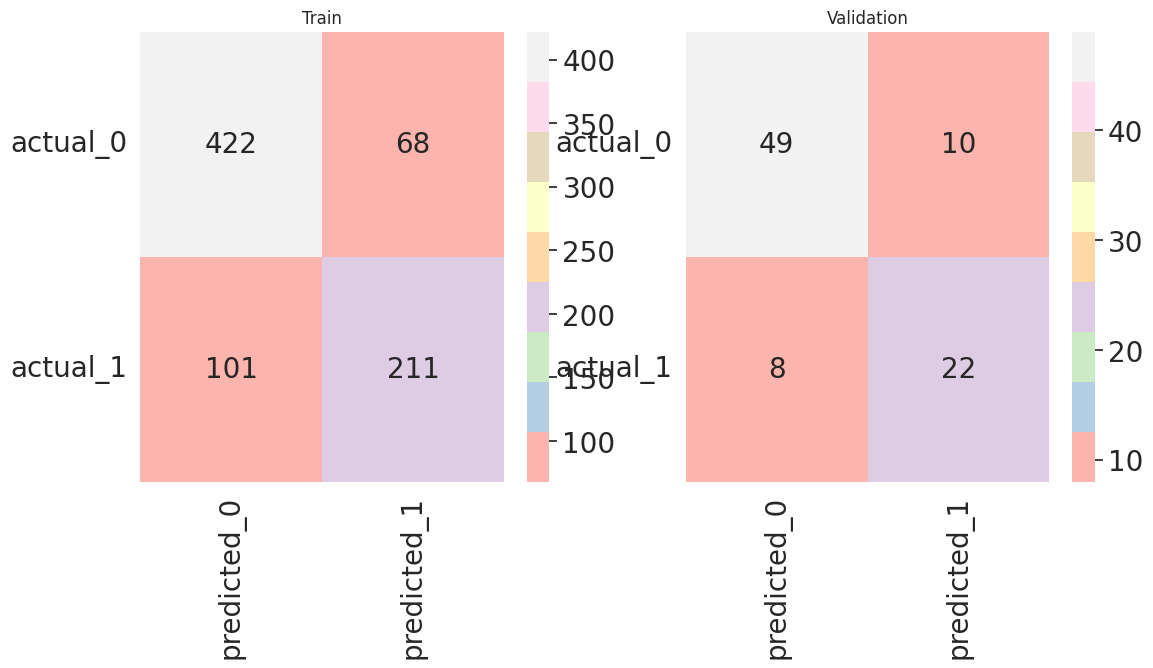

,Tarin,Validation
precision,0.756272,0.687500
recall,0.676282,0.733333
specificity,0.861224,0.830508
fpr,0.138776,0.169492
accuracy,0.789277,0.797753
f1,0.714044,0.709677
balanced accuracy,0.768753,0.781921


mean cv val score: 0.79
mean cv val loss 6.20
mean cv val score: 0.79
mean cv val loss 6.18


In [52]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, bag_fold_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

In [53]:
# get score with bootstrap bagging
bag_boot_model = BaggingClassifier(base_estimator=SGDClassifier(penalty='elasticnet', alpha=0.001), n_estimators=20, random_state=1, bootstrap=True).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('bag_boot_model', bag_boot_model.score(X_selected_features, t).mean())

Accuracy score for classification:
bag_boot_model 0.7946127946127947


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



**Boosting**

In [54]:
# get score with ada boosting
ada_boost_model = AdaBoostClassifier(n_estimators=100, random_state=1).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('ada_boost_model', ada_boost_model.score(X_selected_features, t).mean())

Accuracy score for classification:
ada_boost_model 0.8125701459034792


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Confusion Matrix


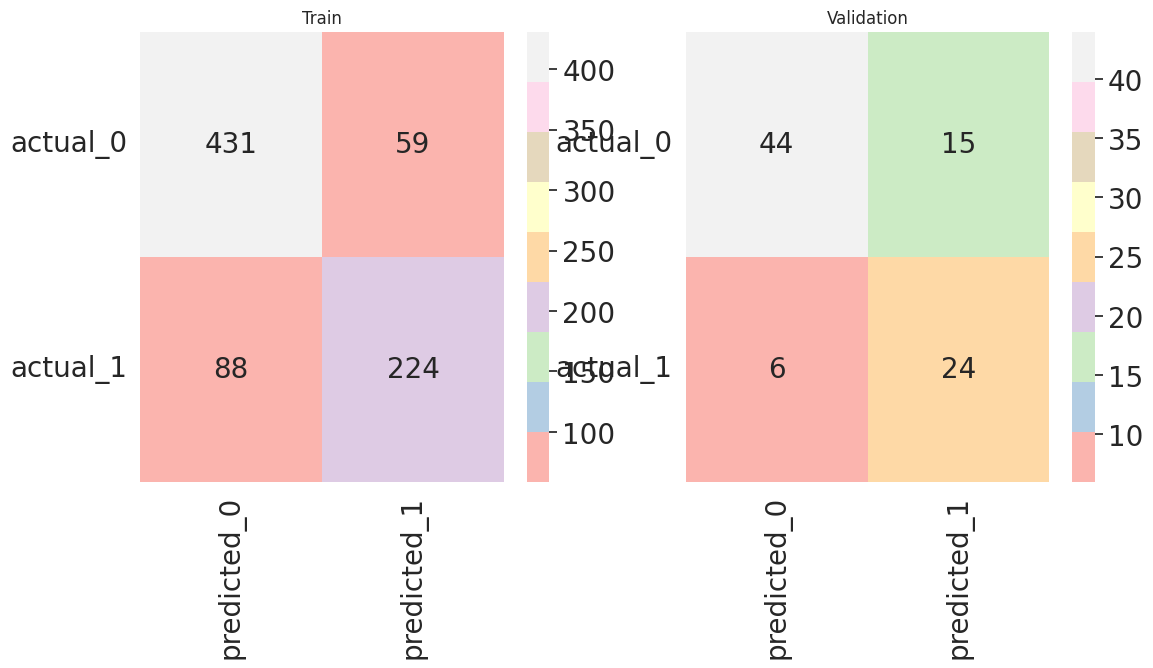

,Tarin,Validation
precision,0.791519,0.615385
recall,0.717949,0.800000
specificity,0.879592,0.745763
fpr,0.120408,0.254237
accuracy,0.816708,0.764045
f1,0.752941,0.695652
balanced accuracy,0.798770,0.772881


mean cv val score: 0.79
mean cv val loss 0.68
mean cv val score: 0.81
mean cv val loss 0.68


In [55]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, ada_boost_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

# KNN

In [56]:
# run KNN on the dataset and find best K by accuracy
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(), hyper_parameters).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

Accuracy score for classification:
gs_neigh_model 0.7924863473730464
best params {'n_neighbors': 6}


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Confusion Matrix


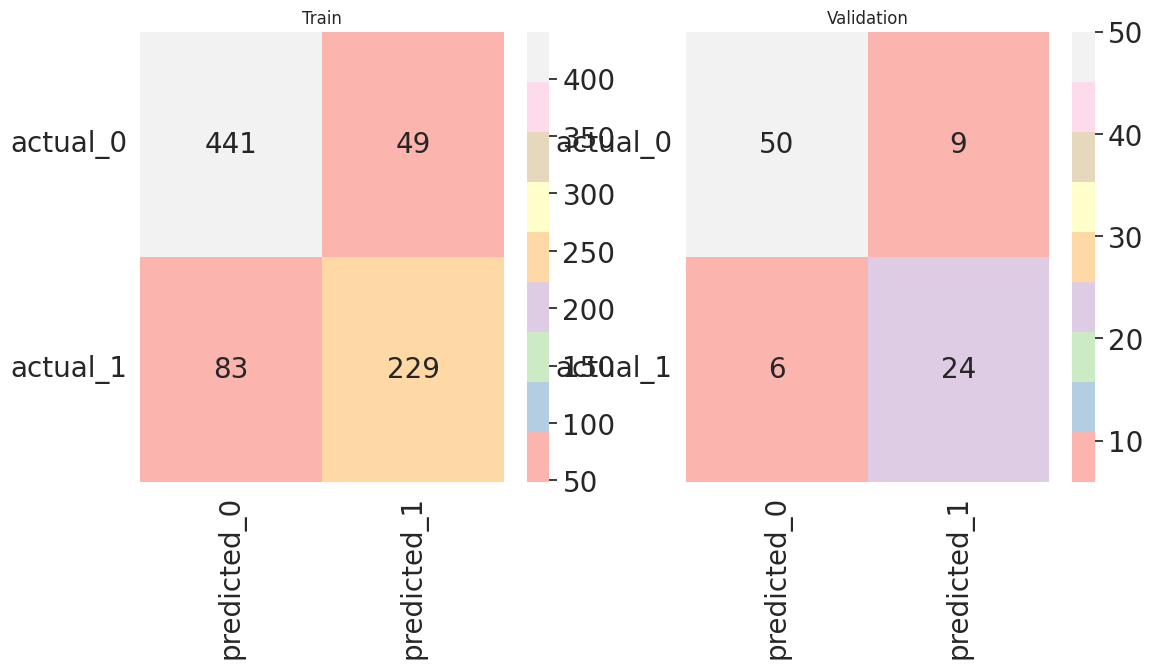

,Tarin,Validation
precision,0.823741,0.727273
recall,0.733974,0.800000
specificity,0.900000,0.847458
fpr,0.100000,0.152542
accuracy,0.835411,0.831461
f1,0.776271,0.761905
balanced accuracy,0.816987,0.823729


mean cv val score: 0.79
mean cv val loss 1.54
mean cv val score: 0.83
mean cv val loss 0.67


In [57]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, gs_neigh_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

# NBC (Naive Bayes)


In [58]:
# show score of nbc on the data
ct_nbc = ColumnTransformer([("scaling", MinMaxScaler(), numerical_cols)])
X_encoded_nbc = pd.DataFrame(ct_nbc.fit_transform(X_cp, t), columns=all_cols)

print('MultinomialNB score:', cross_val_score(MultinomialNB(), X_encoded_nbc, t, cv=15).mean())


MultinomialNB score: 0.6992467043314502


**Results**

It can be seen from the models training that after we used Feature Selection we got 6 features only and then I used the best parameters from Grid Search for each models that i trained. The best model according to the cross validation and the accuracy is ada_boost_model so we will use this model for the prediction of the test.

# Test Classification

In [59]:
model = AdaBoostClassifier(n_estimators=100, random_state=1).fit(X_selected_features, t)

In [60]:
# test encoding
test_selected_features = test_cp[X_selected_features.columns]
test_numerical_cols = test_selected_features.select_dtypes(include=['int64', 'float64']).columns
test_categorical_cols = test_selected_features.select_dtypes(include=['object', 'bool']).columns
test_all_cols = list(test_categorical_cols) + list(test_numerical_cols)
ct_test_std = ColumnTransformer([("standard", StandardScaler(), test_numerical_cols)])
test_encoded = pd.DataFrame(ct_test_std.fit_transform(test_selected_features), columns=test_all_cols)

In [61]:
# predict the test by using ada_boost_model
submission_preds = model.predict(test_encoded)

In [62]:
# create the submission file
submission = pd.DataFrame({
        'PassengerId': test_ids,
        'Survived': submission_preds
    })
submission.to_csv('submission.csv', index=False)
display(submission)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


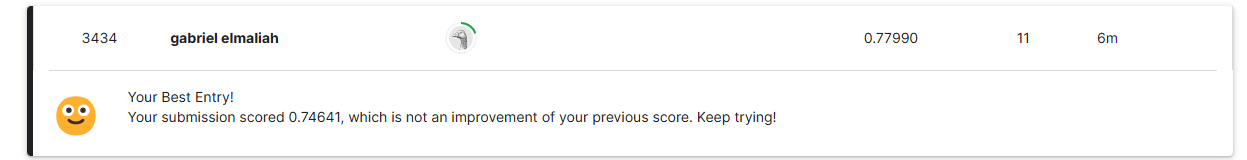

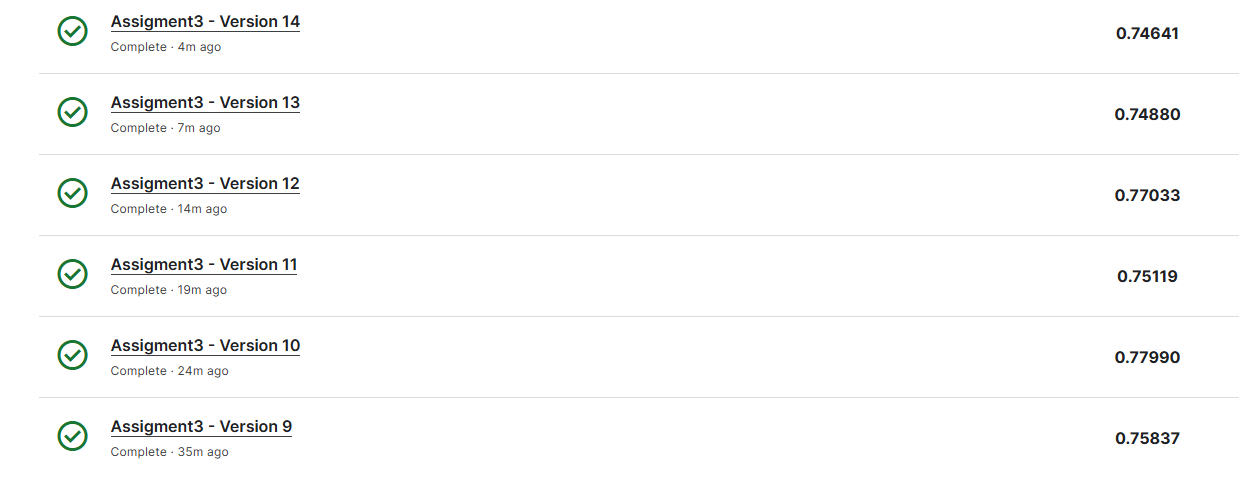